In [90]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import datetime

from sklearn import ensemble
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

import xgboost as xgb

## 1.Load data

In [2]:
df_channel = pd.read_csv('orders_channels.csv')
df_country = pd.read_csv('orders_country.csv')
df_tickets = pd.read_csv('orders_tickets.csv')

## 2. Exploratory Data Analysis (EDA) and Data Preprocessing

In [3]:
df_channel.head()

id        date  channel_id
0   10173  2017-06-12        39.0
1   95062  2017-09-11        35.0
2  171081  2017-07-05        39.0
3  122867  2017-08-18        39.0
4  107186  2017-11-23         NaN

In [4]:
df_channel.shape

(2054059, 3)

In [5]:
df_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054059 entries, 0 to 2054058
Data columns (total 3 columns):
id            int64
date          object
channel_id    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ MB


In [6]:
df_channel['date'].isnull().sum()

0

In [7]:
df_channel['channel_id'].isnull().sum()

295625

In [8]:
df_channel['channel_id'].unique()

array([39., 35., nan, 28., 37., 40., 31., 49., 26., 29.,  2.,  1., 33.,
       17., 30., 25., 23., 38., 43., 36.,  5., 42., 41., 24.,  4., 27.,
       32., 47.,  8., 13.])

In [9]:
len(df_channel['channel_id'].unique())

30

fill channel_id nan with -1

In [10]:
df_channel['channel_id'].fillna(-1, inplace=True)

In [11]:
df_channel['channel_id'].unique()

array([39., 35., -1., 28., 37., 40., 31., 49., 26., 29.,  2.,  1., 33.,
       17., 30., 25., 23., 38., 43., 36.,  5., 42., 41., 24.,  4., 27.,
       32., 47.,  8., 13.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AD82470>]],
      dtype=object)

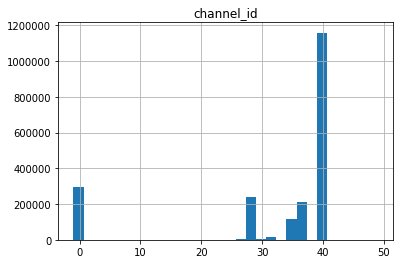

In [12]:
df_channel.hist(column='channel_id', bins=len(df_channel['channel_id'].unique()))

In [13]:
df_channel['date'] = pd.to_datetime(df_channel['date'])

In [14]:
df_country.head()

id  country_1 country_2
0  10503       24.0       NaN
1  79360       24.0         0
2  81388       24.0        15
3  82828       24.0         9
4  38756       23.0       NaN

In [15]:
df_country.shape

(1917668, 3)

In [16]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917668 entries, 0 to 1917667
Data columns (total 3 columns):
id           int64
country_1    float64
country_2    object
dtypes: float64(1), int64(1), object(1)
memory usage: 43.9+ MB


In [17]:
df_country.describe()

id     country_1
count  1.917668e+06  1.899837e+06
mean   9.850860e+05  1.896349e+01
std    5.687706e+05  7.798312e+00
min    1.000000e+00  4.000000e+00
25%    4.926018e+05  1.100000e+01
50%    9.849825e+05  2.400000e+01
75%    1.477636e+06  2.400000e+01
max    1.970544e+06  3.200000e+01

In [18]:
df_country['country_1'].isnull().sum()

17831

In [19]:
df_country['country_1'].unique()

array([24., 23., 19., 11., 12.,  9.,  4., 29., 14.,  5., 20., 26., 27.,
        8., 21.,  7., 32., nan, 28., 17., 15., 31., 16., 22.])

In [20]:
df_country['country_2'].isnull().sum()

748932

In [21]:
df_country['country_2'].unique()

array([nan, '0', '15', '9', '13', '4', '2', '6', '17', '8', '14', '20',
       '16', '12', '3', '19', '18', '11', 'xx', '1', '7'], dtype=object)

replace country nan with -1
replace country xx with -2

In [22]:
df_country['country_1'].fillna(-1, inplace=True)
df_country['country_2'].fillna(-1, inplace=True)
def f(x):
    if x=='xx':
        return '-2'
    return x
df_country['country_2'] = df_country['country_2'].apply(f)

In [23]:
df_country['country_1'].unique()

array([24., 23., 19., 11., 12.,  9.,  4., 29., 14.,  5., 20., 26., 27.,
        8., 21.,  7., 32., -1., 28., 17., 15., 31., 16., 22.])

In [24]:
df_country['country_2'].unique()

array([-1, '0', '15', '9', '13', '4', '2', '6', '17', '8', '14', '20',
       '16', '12', '3', '19', '18', '11', '-2', '1', '7'], dtype=object)

convert string to integer for country_2

In [25]:
df_country['country_2'] = pd.to_numeric(df_country['country_2'])
df_country['country_2'].unique()

array([-1,  0, 15,  9, 13,  4,  2,  6, 17,  8, 14, 20, 16, 12,  3, 19, 18,
       11, -2,  1,  7], dtype=int64)

convert float into integer for country_1

In [26]:
df_country['country_1'] = df_country['country_1'].astype(int)
df_country['country_2'].unique()

array([-1,  0, 15,  9, 13,  4,  2,  6, 17,  8, 14, 20, 16, 12,  3, 19, 18,
       11, -2,  1,  7], dtype=int64)

In [153]:
#le = LabelEncoder()
#le.fit(df_country['country_2'].tolist())
#df_country['country_2'] = le.transform(df_country['country_2'].tolist())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000068D1048>]],
      dtype=object)

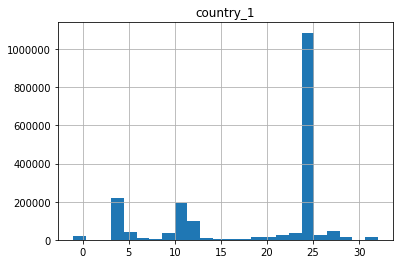

In [27]:
df_country.hist(column='country_1', bins=len(df_country['country_1'].unique()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000069766A0>]],
      dtype=object)

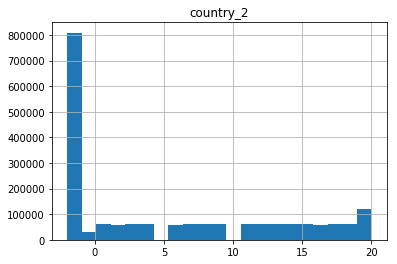

In [28]:
df_country.hist(column='country_2', bins=len(df_country['country_2'].unique()))

In [29]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917668 entries, 0 to 1917667
Data columns (total 3 columns):
id           int64
country_1    int32
country_2    int64
dtypes: int32(1), int64(2)
memory usage: 36.6 MB


In [30]:
df_country.head()

id  country_1  country_2
0  10503         24         -1
1  79360         24          0
2  81388         24         15
3  82828         24          9
4  38756         23         -1

In [31]:
df_tickets.head()

id  n_tickets type
0  1586391          2  pax
1   438232          2  pax
2   270896          1  pax
3  1181593          2  pax
4   964842          1  pax

In [32]:
df_tickets.shape

(1999716, 3)

In [33]:
df_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999716 entries, 0 to 1999715
Data columns (total 3 columns):
id           int64
n_tickets    int64
type         object
dtypes: int64(2), object(1)
memory usage: 45.8+ MB


In [34]:
df_tickets['type'].unique()

array(['pax', 'other'], dtype=object)

In [35]:
df_tickets['n_tickets'].unique()

array([ 2,  1,  8,  4,  6,  5,  3, 12, 10,  7, 14, 20, 60,  9, 13, 11, 22,
       28, 15, 31, 40, 18, 24, 32, 26, 19, 16, 54, 44, 21, 23, 30, 56, 81,
       38, 52, 25, 17, 29, 34, 39, 49, 80, 66, 36, 42, 64, 27, 48, 46, 50,
       35, 41, 76, 70, 57, 58, 43, 45, 33, 68, 74, 67, 65, 47, 84, 37],
      dtype=int64)

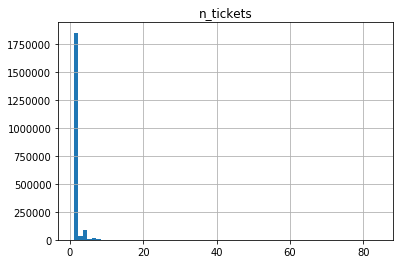

In [36]:
df_tickets.hist(column='n_tickets', bins=len(df_tickets['n_tickets'].unique()))
plt.show()

In [37]:
print(df_tickets['n_tickets'].min())
print(df_tickets['n_tickets'].max())
print(df_tickets['n_tickets'].mean())

1
84
1.4876737496724535


## 3. Data Preparation

In [38]:
df_merged = pd.merge(df_channel, df_tickets, how='left', on=['id'])

In [39]:
df_merged.head()

id       date  channel_id  n_tickets   type
0   10173 2017-06-12        39.0          2    pax
1   95062 2017-09-11        35.0          1    pax
2  171081 2017-07-05        39.0          1    pax
3  122867 2017-08-18        39.0          1  other
4  107186 2017-11-23        -1.0          2    pax

In [40]:
df_merged = pd.merge(df_merged, df_country, how='left', on=['id'])

In [41]:
df_merged.head()

id       date  channel_id  n_tickets   type  country_1  country_2
0   10173 2017-06-12        39.0          2    pax       24.0       -1.0
1   95062 2017-09-11        35.0          1    pax       12.0       -1.0
2  171081 2017-07-05        39.0          1    pax        4.0       11.0
3  122867 2017-08-18        39.0          1  other       24.0       17.0
4  107186 2017-11-23        -1.0          2    pax       12.0       20.0

In [42]:
df_merged['country_1'].unique()

array([24., 12.,  4., 11., 26., 27., 16.,  9.,  5., 29., nan,  7., 15.,
       23., 31., 19., -1., 20., 21., 32., 14.,  8., 28., 17., 22.])

In [43]:
df_merged['country_1'].fillna(-1, inplace=True)

In [44]:
df_merged['country_1'].unique()

array([24., 12.,  4., 11., 26., 27., 16.,  9.,  5., 29., -1.,  7., 15.,
       23., 31., 19., 20., 21., 32., 14.,  8., 28., 17., 22.])

In [45]:
df_merged['country_1'] = df_merged['country_1'].astype(int)
df_merged['country_1'].unique()

array([24, 12,  4, 11, 26, 27, 16,  9,  5, 29, -1,  7, 15, 23, 31, 19, 20,
       21, 32, 14,  8, 28, 17, 22], dtype=int64)

In [46]:
df_merged['country_2'].unique()

array([-1., 11., 17., 20.,  4., 14., 12., -2., 13.,  7.,  8., 16.,  1.,
       15., 19., nan,  3., 18.,  9.,  2.,  6.,  0.])

In [47]:
df_merged['country_2'].fillna(-1, inplace=True)

In [48]:
df_merged['country_2'] = df_merged['country_2'].astype(int)
df_merged['country_2'].unique()

array([-1, 11, 17, 20,  4, 14, 12, -2, 13,  7,  8, 16,  1, 15, 19,  3, 18,
        9,  2,  6,  0], dtype=int64)

In [49]:
df_merged['channel_id'].unique()

array([39., 35., -1., 28., 37., 40., 31., 49., 26., 29.,  2.,  1., 33.,
       17., 30., 25., 23., 38., 43., 36.,  5., 42., 41., 24.,  4., 27.,
       32., 47.,  8., 13.])

In [50]:
df_merged['channel_id'] = df_merged['channel_id'].astype(int)

In [51]:
df_merged['date'] = pd.to_datetime(df_merged['date'])

In [52]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084458 entries, 0 to 2084457
Data columns (total 7 columns):
id            int64
date          datetime64[ns]
channel_id    int32
n_tickets     int64
type          object
country_1     int32
country_2     int32
dtypes: datetime64[ns](1), int32(3), int64(2), object(1)
memory usage: 103.4+ MB


In [53]:
df_merged.head()

id       date  channel_id  n_tickets   type  country_1  country_2
0   10173 2017-06-12          39          2    pax         24         -1
1   95062 2017-09-11          35          1    pax         12         -1
2  171081 2017-07-05          39          1    pax          4         11
3  122867 2017-08-18          39          1  other         24         17
4  107186 2017-11-23          -1          2    pax         12         20

In [54]:
df_merged['n_tickets'].unique()

array([ 2,  1,  8,  4, 10,  6,  3,  5,  7, 11,  9, 26, 16, 12, 29, 20, 81,
       14, 18, 22, 28, 67, 56, 36, 23, 60, 24, 19, 30, 44, 48, 13, 15, 17,
       57, 21, 27, 54, 25, 40, 46, 58, 32, 38, 35, 42, 34, 70, 31, 43, 41,
       50, 74, 65, 52, 39, 68, 84, 80, 76, 45, 47, 37, 49, 33, 64, 66],
      dtype=int64)

#### some orders are assigned to two countries, with country_1 being more important. if there is no value in "country_1", use "country_2"

In [55]:
df_merged['country'] = df_merged['country_1'].values

In [56]:
df_merged['country'] = df_merged['country'].apply(lambda x: df_merged['country_2'] if x==1 else x)

In [57]:
df_merged['country'].unique()

array([24, 12,  4, 11, 26, 27, 16,  9,  5, 29, -1,  7, 15, 23, 31, 19, 20,
       21, 32, 14,  8, 28, 17, 22], dtype=int64)

In [58]:
df_merged.head()

id       date  channel_id  n_tickets   type  country_1  country_2  \
0   10173 2017-06-12          39          2    pax         24         -1   
1   95062 2017-09-11          35          1    pax         12         -1   
2  171081 2017-07-05          39          1    pax          4         11   
3  122867 2017-08-18          39          1  other         24         17   
4  107186 2017-11-23          -1          2    pax         12         20   

   country  
0       24  
1       12  
2        4  
3       24  
4       12

In [59]:
df_merged['country'].isnull().sum()

0

In [60]:
df_merged.head()

id       date  channel_id  n_tickets   type  country_1  country_2  \
0   10173 2017-06-12          39          2    pax         24         -1   
1   95062 2017-09-11          35          1    pax         12         -1   
2  171081 2017-07-05          39          1    pax          4         11   
3  122867 2017-08-18          39          1  other         24         17   
4  107186 2017-11-23          -1          2    pax         12         20   

   country  
0       24  
1       12  
2        4  
3       24  
4       12

In [61]:
df_merged['month'] = df_merged['date'].dt.month
df_merged['day'] = df_merged['date'].dt.day
df_merged['year'] = df_merged['date'].dt.year

In [62]:
df_merged.head()

id       date  channel_id  n_tickets   type  country_1  country_2  \
0   10173 2017-06-12          39          2    pax         24         -1   
1   95062 2017-09-11          35          1    pax         12         -1   
2  171081 2017-07-05          39          1    pax          4         11   
3  122867 2017-08-18          39          1  other         24         17   
4  107186 2017-11-23          -1          2    pax         12         20   

   country  month  day  year  
0       24      6   12  2017  
1       12      9   11  2017  
2        4      7    5  2017  
3       24      8   18  2017  
4       12     11   23  2017

In [63]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084458 entries, 0 to 2084457
Data columns (total 11 columns):
id            int64
date          datetime64[ns]
channel_id    int32
n_tickets     int64
type          object
country_1     int32
country_2     int32
country       int64
month         int64
day           int64
year          int64
dtypes: datetime64[ns](1), int32(3), int64(6), object(1)
memory usage: 167.0+ MB


save the merged dataframe to a csv

In [64]:
df_merged.to_csv('df_merged.csv', index=False)

### Approach 1

For each group (channel, country) 
- Train a regression model on the features (year, month, day) and label (number of tickets).
- Generate a test sample. The date of the test sample is the last date of the train sample in the sample group plus 10 days.
- Predict the label (number of tickets) of the test sample with the trained model.


In [65]:
df_merged = pd.read_csv('df_merged.csv')
df_merged['date'] = pd.to_datetime(df_merged['date'])
#df_merged['country'] = pd.to_numeric(df_merged['country'])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084458 entries, 0 to 2084457
Data columns (total 11 columns):
id            int64
date          datetime64[ns]
channel_id    int64
n_tickets     int64
type          object
country_1     int64
country_2     int64
country       int64
month         int64
day           int64
year          int64
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 174.9+ MB


In [66]:
df_merged['date'].min()

Timestamp('2017-01-01 00:00:00')

In [67]:
df_merged['date'].max()

Timestamp('2018-02-26 00:00:00')

In [68]:
df_merged_grouped = df_merged.groupby(['channel_id', 'country'])

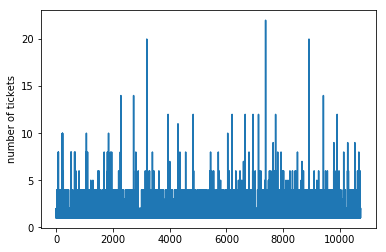

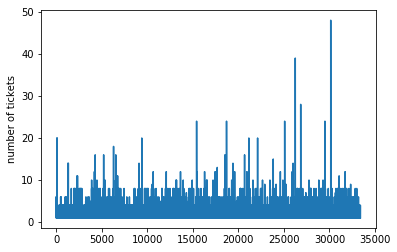

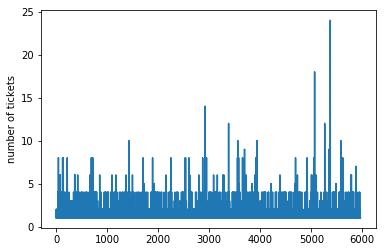

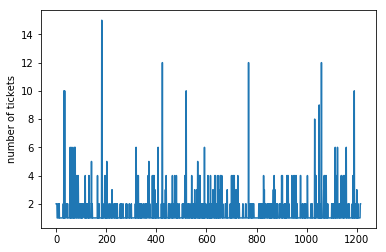

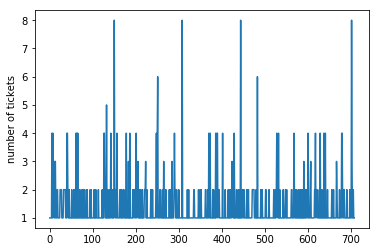

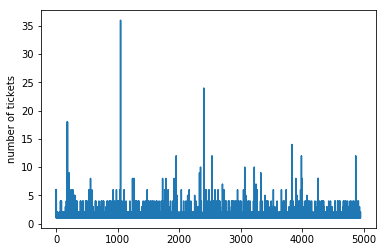

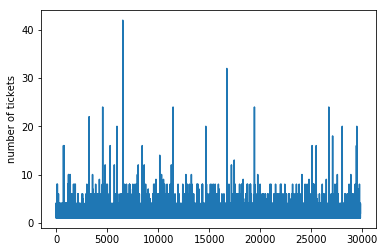

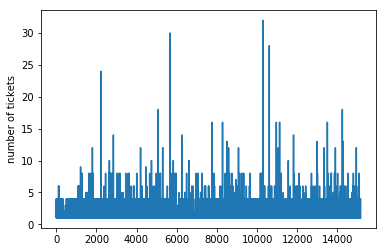

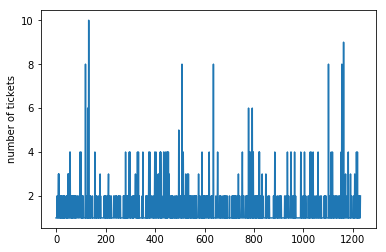

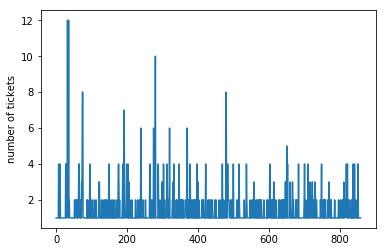

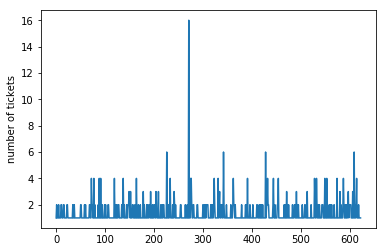

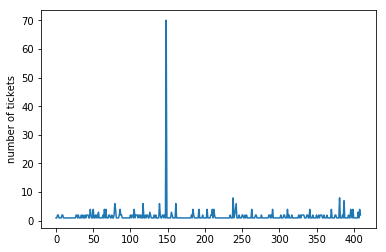

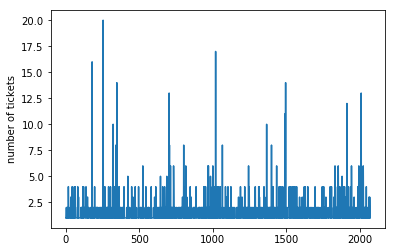

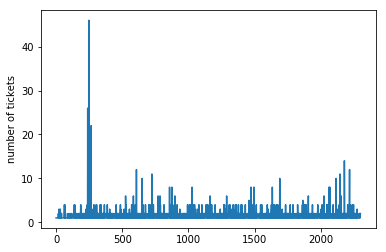

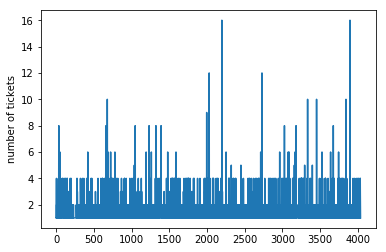

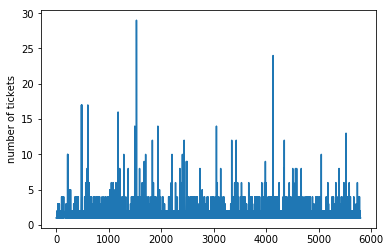

In [ ]:
for name,group in df_merged_grouped:
    group = group.sort_values(by=['date'])
    
    # features are month and day, label is the number of tickets
    y_train = group[['n_tickets']]
    
    plt.plot(y_train.values)
    plt.ylabel('number of tickets')
    plt.show()

In [98]:
#clf_name = 'Ridge'
#clf_name = 'Lasso'
#clf_name = 'LinearRegression'
clf_name = 'randomforest'
#clf_name = 'gradientboosting'


#prepare the output
dict_test = {'date':[], 'country':[], 'channel_id':[], 'n_tickets':[]}

# for each group, train a regression model and predict the number of tickets in the 10 days after the end
for name,group in df_merged_grouped:
    group = group.sort_values(by=['date'])
    
    # features are month and day, label is the number of tickets
    x_train = group[['year', 'month', 'day']]
    y_train = group[['n_tickets']]
    print('----')
    print(y_train.max())
    
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)

    if clf_name == 'Ridge':
        model = Ridge()
    elif clf_name == 'LinearRegression':
        model = LinearRegression()
    elif clf_name == 'randomforest':
        model = ensemble.RandomForestRegressor(max_depth=4, n_estimators=50, random_state=42, verbose=False)
    elif clf_name == 'gradientboosting':
        model = ensemble.GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42, verbose=False)

    model.fit(x_train_scaled, y_train)
    
    date_test = group.iloc[-1]['date'] + pd.Timedelta(days=10)
    x_test = np.array([date_test.year, date_test.month, date_test.day]).reshape(1,3)
    x_test_scaled = scaler.transform(x_test)
    y_test = model.predict(x_test_scaled)
    print(y_test)

    # use the trained linear regression model to predict the number of the tickets in the 10 days after the end of the group
    dict_test['date'].append(date_test)
    dict_test['country'].append(group.iloc[0]['country'])
    dict_test['channel_id'].append(group.iloc[0]['channel_id'])
    if round(y_test[0]) < 0:
        y_test[0] = 0
    print(round(y_test[0]))
    print('----')
    dict_test['n_tickets'].append(round(y_test[0]))
    

df_test = pd.DataFrame(dict_test)
print(df_test)


----
n_tickets    22
dtype: int64
[1.46423271]
1.0
----
----
n_tickets    48
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.4847143]
1.0
----
----
n_tickets    24
dtype: int64
[1.49202016]
1.0
----
----
n_tickets    15
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.47759183]
1.0
----
----
n_tickets    8
dtype: int64
[1.50963097]
2.0
----
----
n_tickets    36
dtype: int64
[1.4332097]
1.0
----
----
n_tickets    42
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[1.50238062]
2.0
----
----
n_tickets    32
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.48902659]
1.0
----
----
n_tickets    10
dtype: int64
[1.38931129]
1.0
----
----
n_tickets    12
dtype: int64
[1.55858421]
2.0
----
----
n_tickets    16
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.52895863]
2.0
----
----
n_tickets    70
dtype: int64
[1.70853052]
2.0
----
----
n_tickets    20
dtype: int64
[1.68997958]
2.0
----
----
n_tickets    46
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.58113653]
2.0
----
----
n_tickets    16
dtype: int64
[1.43595242]
1.0
----
----
n_tickets    29
dtype: int64
[1.4624361]
1.0
----
----
n_tickets    80
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.49740685]
1.0
----
----
n_tickets    15
dtype: int64
[1.45712024]
1.0
----
----
n_tickets    48
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.56156624]
2.0
----
----
n_tickets    10
dtype: int64
[1.27372258]
1.0
----
----
n_tickets    32
dtype: int64
[1.55532791]
2.0
----
----
n_tickets    16
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.30340243]
1.0
----
----
n_tickets    9
dtype: int64
[1.39724041]
1.0
----
----
n_tickets    4
dtype: int64
[1.37049206]
1.0
----
----
n_tickets    6
dtype: int64
[1.81988818]
2.0
----
----
n_tickets    5
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[3.]
3.0
----
----
n_tickets    2
dtype: int64
[1.51733333]
2.0
----
----
n_tickets    2
dtype: int64
[2.]
2.0
----
----
n_tickets    2
dtype: int64
[1.06]
1.0
----
----
n_tickets    4
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.47584662]
1.0
----
----
n_tickets    4
dtype: int64
[1.22102547]
1.0
----
----
n_tickets    2
dtype: int64
[1.24]
1.0
----
----
n_tickets    2
dtype: int64
[1.52]
2.0
----
----
n_tickets    2
dtype: int64
[1.02]
1.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.47166667]
1.0
----
----
n_tickets    8
dtype: int64
[1.7]
2.0
----
----
n_tickets    2
dtype: int64
[1.]
1.0
----
----
n_tickets    4
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[2.56478571]
3.0
----
----
n_tickets    8
dtype: int64
[1.27974095]
1.0
----
----
n_tickets    4
dtype: int64
[2.21133333]
2.0
----
----
n_tickets    2
dtype: int64
[1.117]
1.0
----


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

----
n_tickets    3
dtype: int64
[2.06]
2.0
----
----
n_tickets    4
dtype: int64
[4.]
4.0
----
----
n_tickets    4
dtype: int64
[2.76]
3.0
----
----
n_tickets    4
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.46733333]
1.0
----
----
n_tickets    4
dtype: int64
[1.93466667]
2.0
----
----
n_tickets    2
dtype: int64
[1.2]
1.0
----
----
n_tickets    2
dtype: int64
[2.]
2.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.74]
2.0
----
----
n_tickets    4
dtype: int64
[1.005]
1.0
----
----
n_tickets    4
dtype: int64
[2.13566667]
2.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    4
dtype: int64
[2.32]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    6
dtype: int64
[4.02982571]
4.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.44]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.78]
2.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.29333333]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    3
dtype: int64
[3.]
3.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.02]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.22]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    4
dtype: int64
[1.94]
2.0
----
----
n_tickets    4
dtype: int64
[1.61076227]
2.0
----
----
n_tickets    2
dtype: int64
[1.56]
2.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    4
dtype: int64
[1.31004945]
1.0
----
----
n_tickets    4
dtype: int64
[1.39]
1.0
----
----
n_tickets    2
dtype: int64
[1.44]
1.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.56]
2.0
----
----
n_tickets    4
dtype: int64
[1.78]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    4
dtype: int64
[2.86]
3.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.54]
2.0
----
----
n_tickets    4
dtype: int64
[2.76]
3.0
----
----
n_tickets    9
dtype: int64
[1.65075698]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.88]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64
[2.]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    3
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.24]
1.0
----
----
n_tickets    6
dtype: int64
[2.10861905]
2.0
----
----
n_tickets    2
dtype: int64
[1.42]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    3
dtype: int64
[2.38]
2.0
----
----
n_tickets    6
dtype: int64
[3.7]
4.0
----
----
n_tickets    2
dtype: int64
[1.02]
1.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.56]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.34]
1.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.74]
2.0
----
----
n_tickets    4
dtype: int64
[1.6]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    4
dtype: int64
[1.57112597]
2.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[2.]
2.0
----
----
n_tickets    2
dtype: int64
[1.06]
1.0
----
----
n_tickets    2
dtype: int64
[2.]
2.0
----
----
n_tickets    4
dtype: int64
[2.52]
3.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    2
dtype: int64
[2.]
2.0
----
----
n_tickets    8
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    4
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[2.06]
2.0
----
----
n_tickets    3
dtype: int64
[1.66388256]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.5]
2.0
----
----
n_tickets    2
dtype: int64
[1.77157143]
2.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    4
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.28432707]
1.0
----
----
n_tickets    2
dtype: int64
[1.232]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.51]
2.0
----
----
n_tickets    6
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.28396228]
1.0
----
----
n_tickets    8
dtype: int64
[1.35481425]
1.0
----
----
n_tickets    5
dtype: int64
[1.82453454]
2.0
----
----
n_tickets    4
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.53196825]
2.0
----
----
n_tickets    2
dtype: int64
[1.02]
1.0
----
----
n_tickets    4
dtype: int64
[1.83446333]
2.0
----
----
n_tickets    10
dtype: int64
[1.62292509]
2.0
----
----
n_tickets    10
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.47281507]
1.0
----
----
n_tickets    6
dtype: int64
[2.59111111]
3.0
----
----
n_tickets    8
dtype: int64
[1.63333333]
2.0
----
----
n_tickets    5
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.92]
2.0
----
----
n_tickets    4
dtype: int64
[2.26]
2.0
----
----
n_tickets    4
dtype: int64
[1.58216811]
2.0
----
----
n_tickets    8
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.33816667]
1.0
----
----
n_tickets    4
dtype: int64
[1.26819677]
1.0
----
----
n_tickets    7
dtype: int64
[2.12195954]
2.0
----
----
n_tickets    21
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.55735055]
2.0
----
----
n_tickets    6
dtype: int64
[1.71208327]
2.0
----
----
n_tickets    4
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.76815743]
2.0
----
----
n_tickets    2
dtype: int64
[1.68]
2.0
----
----
n_tickets    6
dtype: int64
[3.13006061]
3.0
----
----
n_tickets    4
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[3.34]
3.0
----
----
n_tickets    10
dtype: int64
[1.02520588]
1.0
----
----
n_tickets    2
dtype: int64
[1.29]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    4
dtype: int64
[4.]
4.0
----
----
n_tickets    2
dtype: int64
[2.]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----

C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector


n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.]
1.0
----
----
n_tickets    24
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.428713]
1.0
----
----
n_tickets    49
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.4867237]
1.0
----
----
n_tickets    32
dtype: int64
[1.45673875]
1.0
----
----
n_tickets    14
dtype: int64
[1.60301688]
2.0
----
----
n_tickets    6
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.33402566]
1.0
----
----
n_tickets    20
dtype: int64
[1.42270944]
1.0
----
----
n_tickets    67
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.49389403]
1.0
----
----
n_tickets    54
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.5014565]
2.0
----
----
n_tickets    11
dtype: int64
[1.52283728]
2.0
----
----
n_tickets    8
dtype: int64
[1.55133601]
2.0
----
----
n_tickets    8
dtype: int64
[1.44620742]
1.0
----
----
n_tickets    14
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.48835619]
1.0
----
----
n_tickets    18
dtype: int64
[1.4474093]
1.0
----
----
n_tickets    20
dtype: int64
[1.55354029]
2.0
----
----
n_tickets    52
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.48559594]
1.0
----
----
n_tickets    28
dtype: int64
[1.47782677]
1.0
----
----
n_tickets    56
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.48767169]
1.0
----
----
n_tickets    12
dtype: int64
[1.43644674]
1.0
----
----
n_tickets    54
dtype: int64
[1.47075266]
1.0
----
----
n_tickets    12
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.88727797]
2.0
----
----
n_tickets    14
dtype: int64
[1.40678023]
1.0
----
----
n_tickets    16
dtype: int64
[1.70399292]
2.0
----
----
n_tickets    12
dtype: int64
[1.5085828]
2.0
----
----
n_tickets    6
dtype: int64
[1.27012322]
1.0
----
----
n_tickets    10
dtype: int64
[1.50033526]
2.0
----
----
n_tickets    8
dtype: int64
[1.21819199]
1.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.54866667]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    6
dtype: int64
[1.42664033]
1.0
----
----
n_tickets    9
dtype: int64
[1.74366529]
2.0
----
----
n_tickets    8
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[2.3588872]
2.0
----
----
n_tickets    2
dtype: int64
[1.12333333]
1.0
----
----
n_tickets    4
dtype: int64
[1.28]
1.0
----
----
n_tickets    2
dtype: int64
[1.34]
1.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.16]
1.0
----
----
n_tickets    4
dtype: int64
[1.07]
1.0
----
----
n_tickets    4
dtype: int64
[1.02620646]
1.0
----
----
n_tickets    10
dtype: int64
[1.71933605]
2.0
----
----
n_tickets    17
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.30594353]
1.0
----
----
n_tickets    12
dtype: int64
[1.57516187]
2.0
----
----
n_tickets    6
dtype: int64
[1.37884658]
1.0
----
----
n_tickets    10
dtype: int64
[3.99736742]
4.0
----
----
n_tickets    2
dtype: int64
[2.]
2.0
----
----
n_tickets    2
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.15]
1.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.14]
1.0
----
----
n_tickets    3
dtype: int64
[1.055]
1.0
----
----
n_tickets    10
dtype: int64
[5.04169509]
5.0
----
----
n_tickets    6
dtype: int64
[1.23607143]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.94]
2.0
----
----
n_tickets    8
dtype: int64
[1.43921305]
1.0
----
----
n_tickets    6
dtype: int64
[1.637481]
2.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.52]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64
[2.]
2.0
----
----
n_tickets    4
dtype: int64
[1.03]
1.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.04]
1.0
----
----
n_tickets    2
dtype: int64
[1.06]
1.0
----
----
n_tickets    2
dtype: int64
[1.]
1.0
----
----
n_tickets    11
dtype: int64
[1.4453588]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    6
dtype: int64
[1.48035714]
1.0
----
----
n_tickets    3
dtype: int64
[2.]
2.0
----
----
n_tickets    4
dtype: int64
[1.72]
2.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.3]
1.0
----
----
n_tickets    18
dtype: int64
[1.45047275]
1.0
----
----
n_tickets    14
dtype: int64
[1.55845904]
2.0
----
----
n_tickets    25
dtype: int64
[1.57821616]
2.0
----
----
n_tickets    12
dtype: int64
[1.53850981]
2.0
----
----
n_tickets    8
dtype: int64
[1.21778892]
1.0
----
----
n_tickets    8
dtype: int64
[1.68595408]
2.0
----
----
n_tickets    17
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.38566813]
1.0
----
----
n_tickets    10
dtype: int64
[1.34769302]
1.0
----
----
n_tickets    8
dtype: int64
[1.42055914]
1.0
----
----
n_tickets    4
dtype: int64
[1.29938528]
1.0
----
----
n_tickets    6
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[3.33333333]
3.0
----
----
n_tickets    4
dtype: int64
[3.12]
3.0
----
----
n_tickets    8
dtype: int64
[1.60826578]
2.0
----
----
n_tickets    6
dtype: int64
[1.33592749]
1.0
----
----
n_tickets    6
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.42288864]
1.0
----
----
n_tickets    8
dtype: int64
[1.42612974]
1.0
----
----
n_tickets    25
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.48218871]
1.0
----
----
n_tickets    8
dtype: int64
[1.22324582]
1.0
----
----
n_tickets    12
dtype: int64
[1.57110586]
2.0
----
----
n_tickets    2
dtype: int64
[1.]
1.0
----
----
n_tickets    8
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[2.69387423]
3.0
----
----
n_tickets    8
dtype: int64
[1.46603632]
1.0
----
----
n_tickets    4
dtype: int64
[1.22782576]
1.0
----
----
n_tickets    2
dtype: int64
[1.26]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.72]
2.0
----
----
n_tickets    4
dtype: int64
[1.13250926]
1.0
----
----
n_tickets    8
dtype: int64
[1.48142677]
1.0
----
----
n_tickets    8
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.63454545]
2.0
----
----
n_tickets    2
dtype: int64
[1.3]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    8
dtype: int64
[1.13865079]
1.0
----
----
n_tickets    4
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.20575828]
1.0
----
----
n_tickets    6
dtype: int64
[1.22322505]
1.0
----
----
n_tickets    2
dtype: int64
[2.]
2.0
----
----
n_tickets    2
dtype: int64
[1.8]
2.0
----
----
n_tickets    4
dtype: int64
[2.32]
2.0
----
----
n_tickets    2
dtype: int64
[1.44]
1.0
----
----
n_tickets    5
dtype: int64
[1.54]
2.0
----
----
n_tickets    2
dtype: int64
[1.52]
2.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.2]
1.0
----
----
n_tickets    4
dtype: int64
[1.36377778]
1.0
----
----
n_tickets    18
dtype: int64
[1.36989101]
1.0
----
----
n_tickets    3
dtype: int64
[1.58333333]
2.0
----
----
n_tickets    4
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.58362121]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    4
dtype: int64
[1.18]
1.0
----
----
n_tickets    3
dtype: int64
[1.52]
2.0
----
----
n_tickets    8
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[5.46]
5.0
----
----
n_tickets    40
dtype: int64
[1.504269]
2.0
----
----
n_tickets    40
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.49772976]
1.0
----
----
n_tickets    22
dtype: int64
[1.51342953]
2.0
----
----
n_tickets    8
dtype: int64
[1.39044348]
1.0
----
----
n_tickets    10
dtype: int64
[1.70023203]
2.0
----
----
n_tickets    13
dtype: int64
[1.49060566]
1.0
----
----
n_tickets    39
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.46371032]
1.0
----
----
n_tickets    54
dtype: int64
[1.47134569]
1.0
----
----
n_tickets    20
dtype: int64
[1.39507336]
1.0
----
----
n_tickets    8
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.30269632]
1.0
----
----
n_tickets    16
dtype: int64
[1.35271457]
1.0
----
----
n_tickets    8
dtype: int64
[1.30826004]
1.0
----
----
n_tickets    8
dtype: int64
[1.36008845]
1.0
----
----
n_tickets    16
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.62037245]
2.0
----
----
n_tickets    16
dtype: int64
[1.49663992]
1.0
----
----
n_tickets    2
dtype: int64
[2.]
2.0
----
----
n_tickets    12
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.45613364]
1.0
----
----
n_tickets    56
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.49566899]
1.0
----
----
n_tickets    58
dtype: int64
[1.54585702]
2.0
----
----
n_tickets    19
dtype: int64
[1.64581179]
2.0
----
----
n_tickets    6
dtype: int64
[1.53063687]

C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit


2.0
----
----
n_tickets    32
dtype: int64
[1.68767322]
2.0
----
----
n_tickets    7
dtype: int64
[1.55075116]
2.0
----
----
n_tickets    12
dtype: int64
[1.37659793]
1.0
----
----
n_tickets    2
dtype: int64
[1.32]
1.0
----
----
n_tickets    8
dtype: int64
[1.57994444]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    4
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.65114286]
2.0
----
----
n_tickets    2
dtype: int64
[1.49]
1.0
----
----
n_tickets    2
dtype: int64
[1.74]
2.0
----
----
n_tickets    4
dtype: int64
[2.53]
3.0
----
----
n_tickets    6
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.88801258]
2.0
----
----
n_tickets    4
dtype: int64
[1.98]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    36
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.54273135]
2.0
----
----
n_tickets    48
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.47739075]
1.0
----
----
n_tickets    44
dtype: int64
[1.53677969]
2.0
----
----
n_tickets    10
dtype: int64
[1.37675812]
1.0
----
----
n_tickets    22
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.35267814]
1.0
----
----
n_tickets    32
dtype: int64
[1.52215567]
2.0
----
----
n_tickets    38
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.49854057]
1.0
----
----
n_tickets    24
dtype: int64
[1.48411525]
1.0
----
----
n_tickets    28
dtype: int64
[1.52851816]

C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit


2.0
----
----
n_tickets    40
dtype: int64
[1.43788145]
1.0
----
----
n_tickets    16
dtype: int64
[1.47420547]
1.0
----
----
n_tickets    8
dtype: int64
[1.2146015]
1.0
----
----
n_tickets    54
dtype: int64
[1.51763592]
2.0
----
----
n_tickets    24
dtype: int64
[1.69000798]
2.0
----
----
n_tickets    32
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.48699778]
1.0
----
----
n_tickets    54
dtype: int64
[1.47090866]
1.0
----
----
n_tickets    58
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.47123915]
1.0
----
----
n_tickets    22
dtype: int64
[1.4913298]
1.0
----
----
n_tickets    34
dtype: int64
[1.45372491]
1.0
----
----
n_tickets    6
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.1864999]
1.0
----
----
n_tickets    16
dtype: int64
[1.48014045]
1.0
----
----
n_tickets    7
dtype: int64
[1.41609758]
1.0
----
----
n_tickets    14
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.43391579]
1.0
----
----
n_tickets    4
dtype: int64
[1.36]
1.0
----
----
n_tickets    4
dtype: int64
[1.57896282]
2.0
----
----
n_tickets    4
dtype: int64
[1.33666667]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    4
dtype: int64
[1.9]
2.0
----
----
n_tickets    4
dtype: int64
[1.08133333]
1.0
----
----
n_tickets    4
dtype: int64
[1.71160714]
2.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    5
dtype: int64
[1.]
1.0
----
----
n_tickets    3
dtype: int64
[3.]
3.0
----
----
n_tickets    2
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.215]
1.0
----
----
n_tickets    8
dtype: int64
[1.40378689]
1.0
----
----
n_tickets    2
dtype: int64
[1.26]
1.0
----
----
n_tickets    2
dtype: int64
[1.3]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.18]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    4
dtype: int64
[1.54]
2.0
----
----
n_tickets    64
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.46813085]
1.0
----
----
n_tickets    42
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.50246145]
2.0
----
----
n_tickets    44
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.52641826]
2.0
----
----
n_tickets    31
dtype: int64
[1.50292644]
2.0
----
----
n_tickets    24
dtype: int64
[1.71511295]
2.0
----
----
n_tickets    36
dtype: int64

C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



[1.493081]
1.0
----
----
n_tickets    76
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.49661794]
1.0
----
----
n_tickets    56
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.48163885]
1.0
----
----
n_tickets    28
dtype: int64
[1.5108649]
2.0
----
----
n_tickets    20
dtype: int64
[1.67521069]
2.0
----
----
n_tickets    20
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.52199619]
2.0
----
----
n_tickets    18
dtype: int64
[1.70476641]
2.0
----
----
n_tickets    20
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.47064364]
1.0
----
----
n_tickets    30
dtype: int64
[1.48365955]
1.0
----
----
n_tickets    44
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[1.51700324]
2.0
----
----
n_tickets    48
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[1.51670954]
2.0
----
----
n_tickets    84
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[1.48445028]
1.0
----
----
n_tickets    25
dtype: int64
[1.49588379]
1.0
----
----
n_tickets    46
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.46195757]
1.0
----
----
n_tickets    24
dtype: int64
[1.52197413]
2.0
----
----
n_tickets    41
dtype: int64
[1.46097944]
1.0
----
----
n_tickets    15
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[1.56938411]
2.0
----
----
n_tickets    36
dtype: int64
[1.5254791]
2.0
----
----
n_tickets    10
dtype: int64
[1.60336459]
2.0
----
----
n_tickets    10
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.43285651]
1.0
----
----
n_tickets    10
dtype: int64
[1.61825802]
2.0
----
----
n_tickets    8
dtype: int64
[2.14]
2.0
----
----
n_tickets    4
dtype: int64
[1.38104762]
1.0
----
----
n_tickets    20
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.38418208]
1.0
----
----
n_tickets    16
dtype: int64
[1.5148183]
2.0
----
----
n_tickets    8
dtype: int64
[1.46145708]
1.0
----
----
n_tickets    3
dtype: int64
[1.77703151]
2.0
----
----
n_tickets    3
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.126]
1.0
----
----
n_tickets    2
dtype: int64
[1.74]
2.0
----
----
n_tickets    2
dtype: int64
[1.06]
1.0
----
----
n_tickets    6
dtype: int64
[1.25501833]
1.0
----
----
n_tickets    8
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[2.18880458]
2.0
----
----
n_tickets    8
dtype: int64
[1.74129367]
2.0
----
----
n_tickets    6
dtype: int64
[1.4394964]
1.0
----
----
n_tickets    29
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.44799427]
1.0
----
----
n_tickets    6
dtype: int64
[1.22965912]
1.0
----
----
n_tickets    10
dtype: int64
[1.98873164]
2.0
----
----
n_tickets    2
dtype: int64
[1.18]
1.0
----
----
n_tickets    4
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.90578571]
2.0
----
----
n_tickets    4
dtype: int64
[1.58333333]
2.0
----
----
n_tickets    8
dtype: int64
[1.30943723]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    3
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.26]
1.0
----
----
n_tickets    2
dtype: int64
[2.]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    3
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.16]
1.0
----
----
n_tickets    4
dtype: int64
[1.18]
1.0
----
----
n_tickets    3
dtype: int64
[2.52]
3.0
----
----
n_tickets    2
dtype: int64
[1.44]
1.0
----
----
n_tickets    6
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.24875758]
1.0
----
----
n_tickets    2
dtype: int64
[1.74]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    7
dtype: int64
[2.8]
3.0
----
----
n_tickets    4
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    2
dtype: int64
[2.]
2.0
----
----
n_tickets    4
dtype: int64
[2.14242857]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.9]
2.0
----
----
n_tickets    2
dtype: int64
[1.52]
2.0
----
----
n_tickets    4
dtype: int64
[1.07335354]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    6
dtype: int64
[6.]
6.0
----
----
n_tickets    2
dtype: int64
[1.74]
2.0
----
----
n_tickets    3
dtype: int64
[2.26]
2.0
----
----
n_tickets    2
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.32]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    8
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.]
1.0
----
----
n_tickets    24
dtype: int64
[2.9995987]
3.0
----
----
n_tickets    4
dtype: int64
[1.9]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.]
1.0
----
----
n_tickets    4
dtype: int64
[1.34]
1.0
----
----
n_tickets    4
dtype: int64
[1.35055506]
1.0
----
----
n_tickets    5
dtype: int64
[1.30108136]
1.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector

[1.]
1.0
----
----
n_tickets    3
dtype: int64
[2.2]
2.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64
[2.]
2.0
----
----
n_tickets    4
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.06]
1.0
----
----
n_tickets    4
dtype: int64
[1.]
1.0
----
----
n_tickets    4
dtype: int64
[2.2]
2.0
----
----
n_tickets    2
dtype: int64
[1.87928571]
2.0
----
----
n_tickets    8
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.31834879]
1.0
----
----
n_tickets    3
dtype: int64
[1.25]
1.0
----
----
n_tickets    4
dtype: int64
[2.84]
3.0
----
----
n_tickets    3
dtype: int64
[2.48]
2.0
----
----
n_tickets    1
dtype: int64


C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Chen.Kai\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data wit

[1.]
1.0
----
----
n_tickets    1
dtype: int64
[1.]
1.0
----
----
n_tickets    2
dtype: int64
[1.76]
2.0
----
          date  country  channel_id  n_tickets
0   2018-03-08       -1          -1        1.0
1   2018-03-08        4          -1        1.0
2   2018-03-08        5          -1        1.0
3   2018-03-08        7          -1        1.0
4   2018-03-08        8          -1        2.0
5   2018-03-08        9          -1        1.0
6   2018-03-08       11          -1        2.0
7   2018-03-08       12          -1        1.0
8   2018-03-08       14          -1        1.0
9   2018-03-07       15          -1        2.0
10  2018-03-08       16          -1        2.0
11  2018-03-07       17          -1        2.0
12  2018-03-08       19          -1        2.0
13  2018-03-08       20          -1        2.0
14  2018-03-08       21          -1        1.0
15  2018-03-08       23          -1        1.0
16  2018-03-08       24          -1        1.0
17  2018-03-08       26          -1        1

C:\Users\Chen.Kai\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [99]:
set(df_test['n_tickets'].tolist())

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0}

Based on the prediction results, it shows that with only year, month, and day it is not possible to estimate number of tickets correctly.

save prediction results to a csv

In [73]:
df_test.to_csv('pred_approach1_{}.csv'.format(clf_name), index=False)

### Approach 2

For each group (channel, country) 
- Compute the average number of tickets and this number would be the number of tickets in the next 10 days

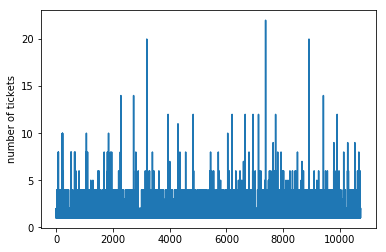

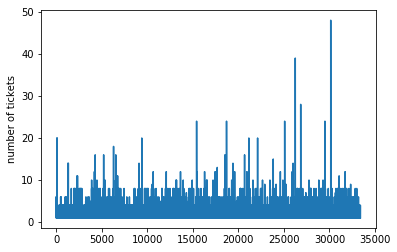

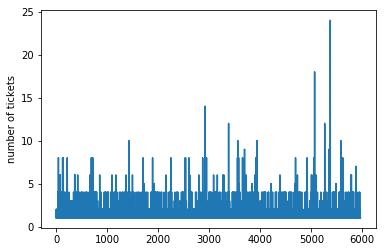

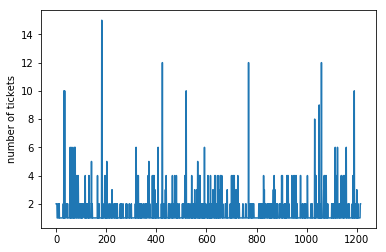

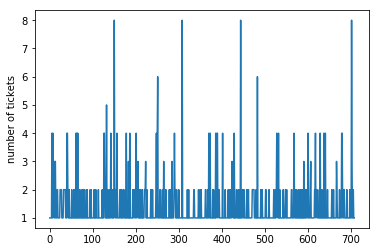

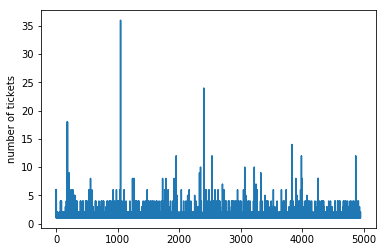

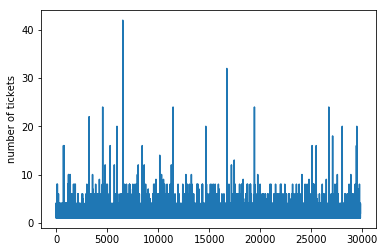

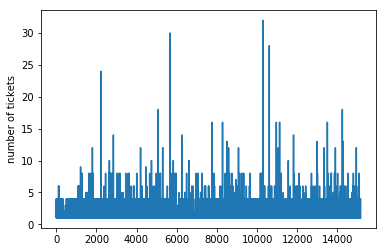

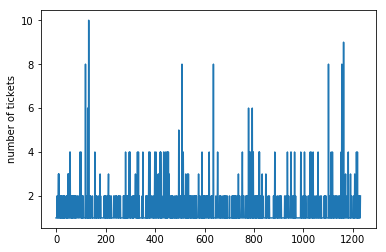

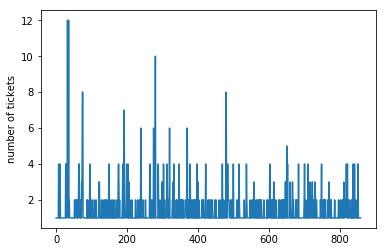

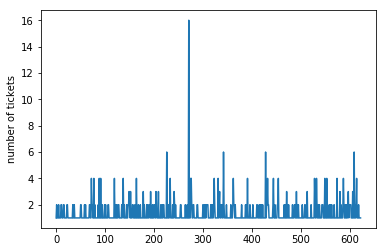

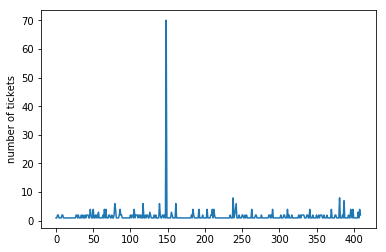

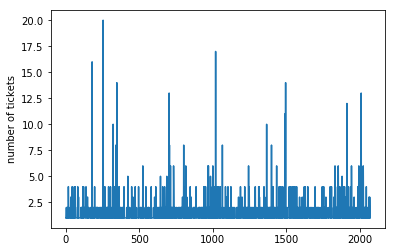

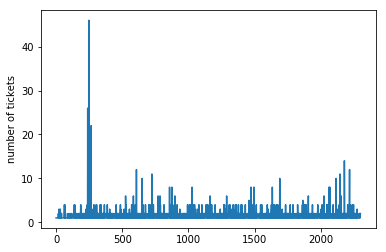

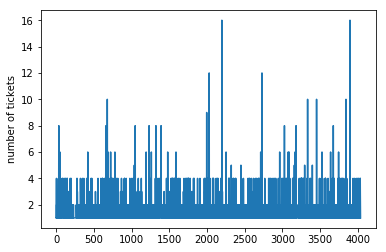

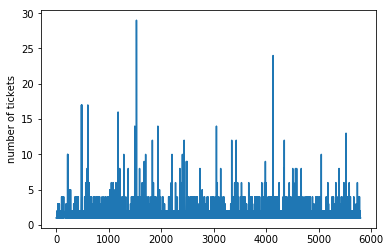

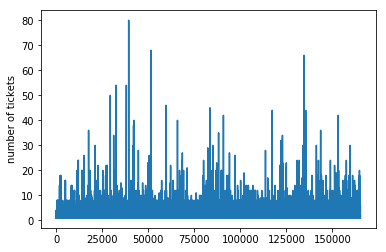

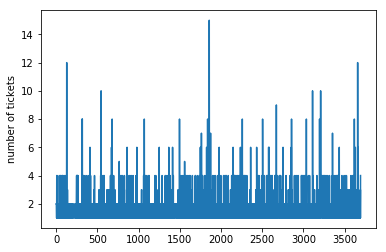

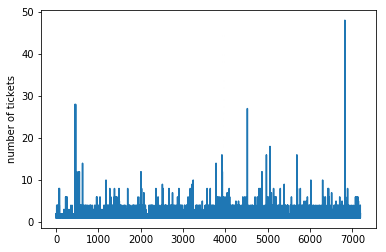

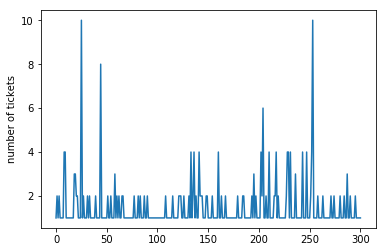

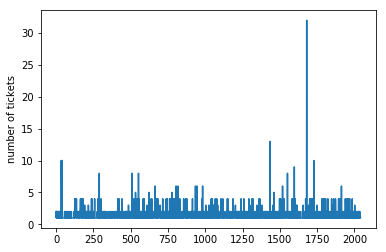

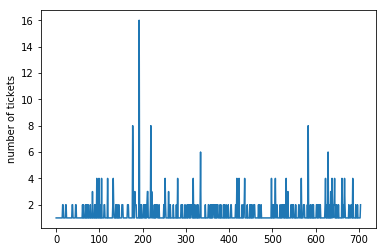

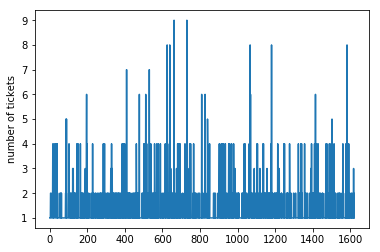

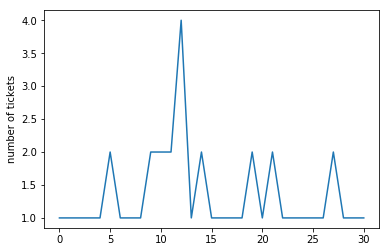

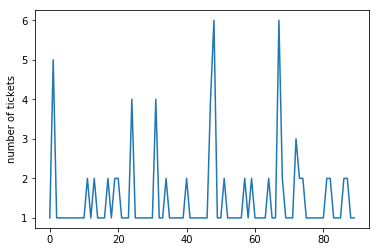

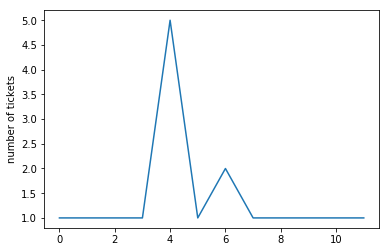

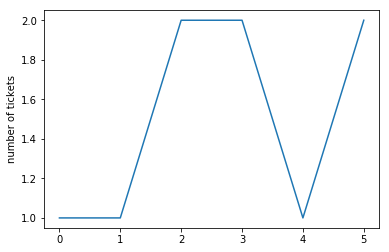

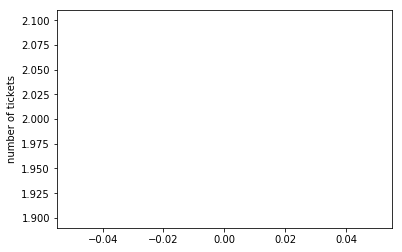

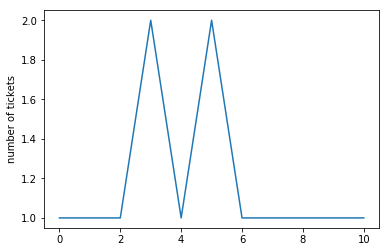

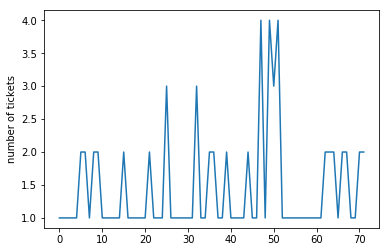

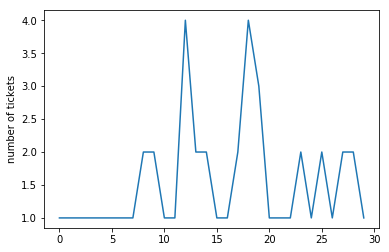

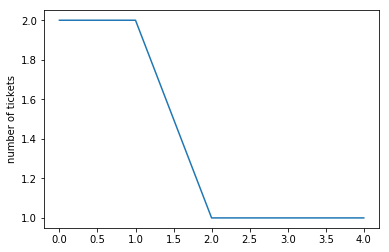

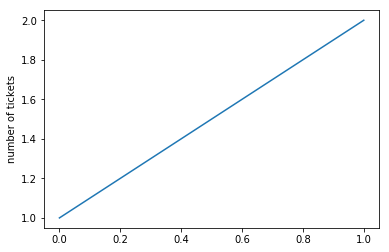

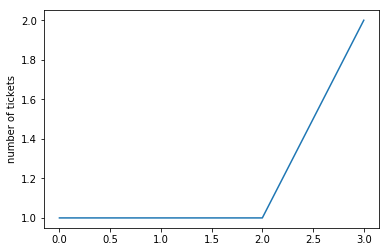

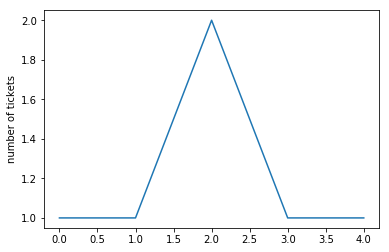

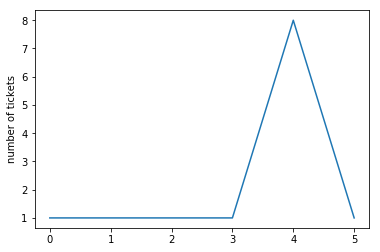

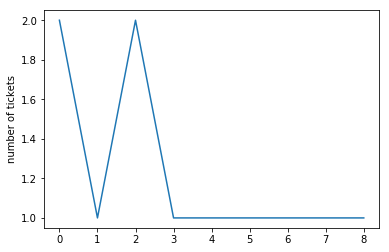

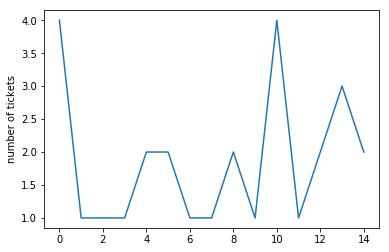

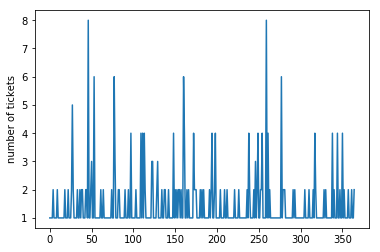

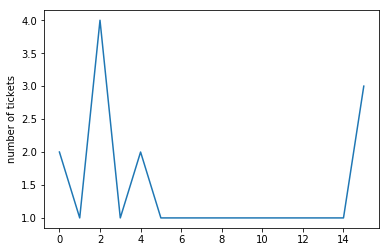

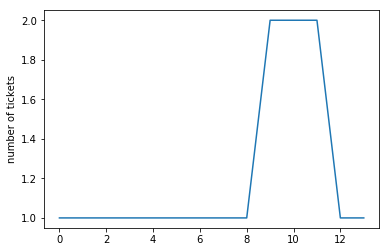

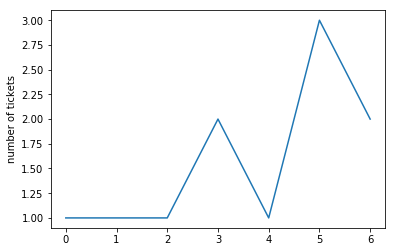

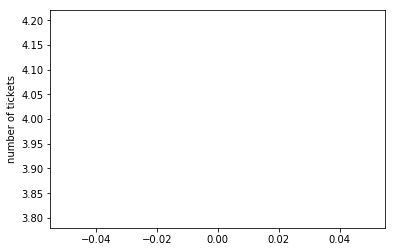

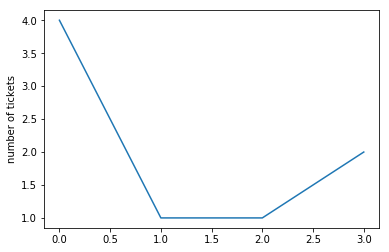

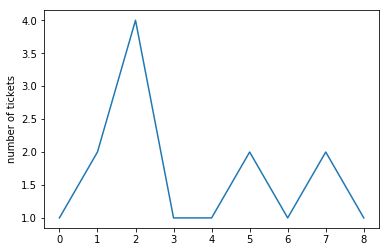

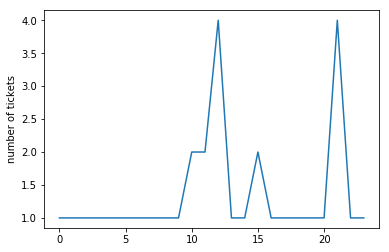

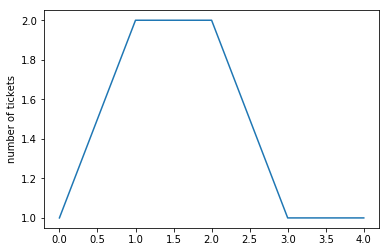

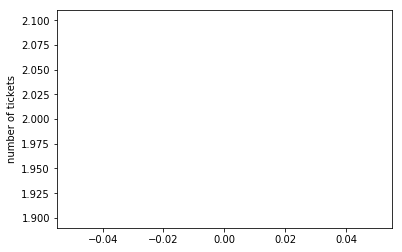

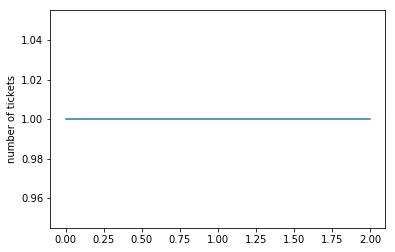

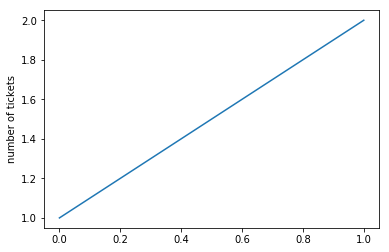

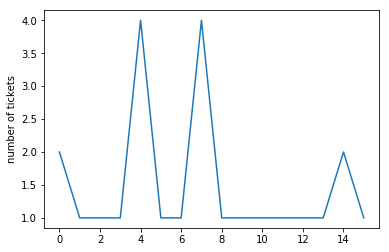

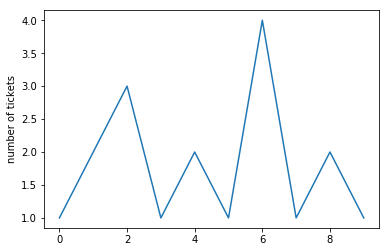

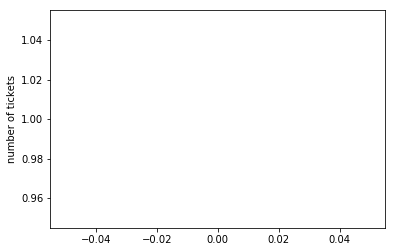

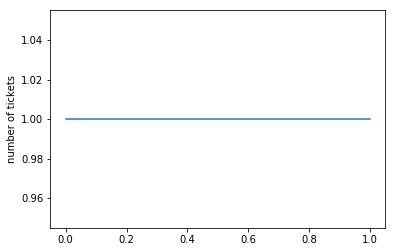

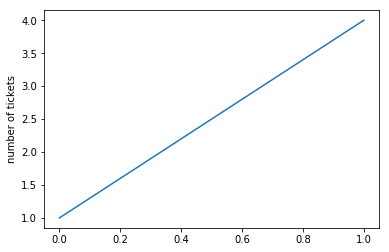

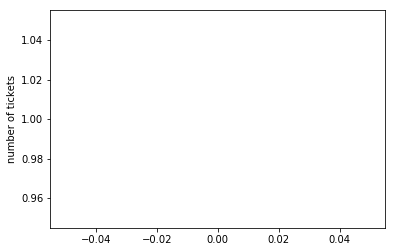

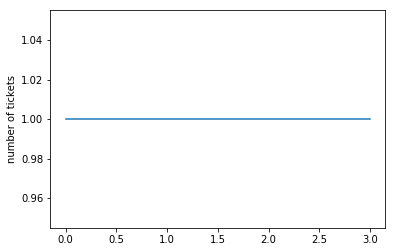

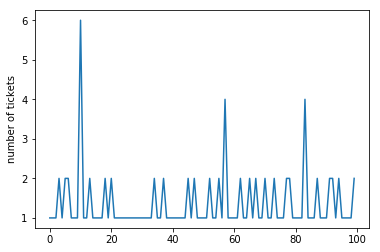

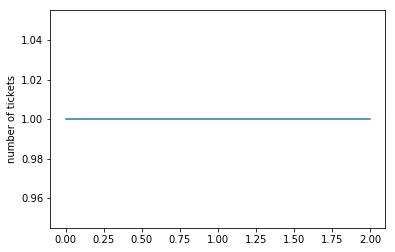

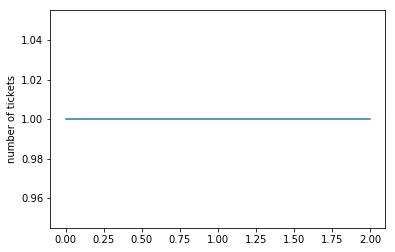

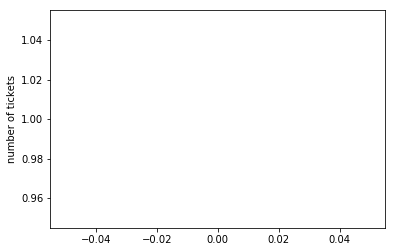

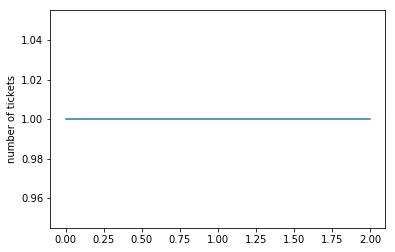

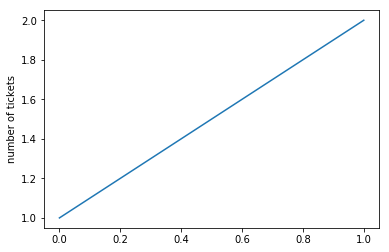

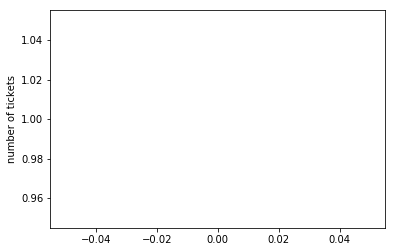

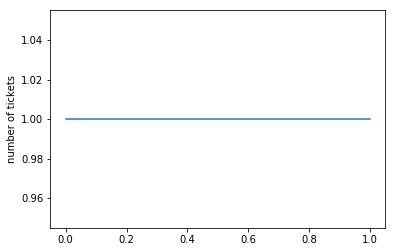

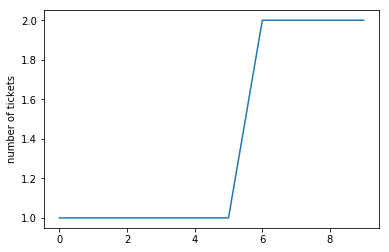

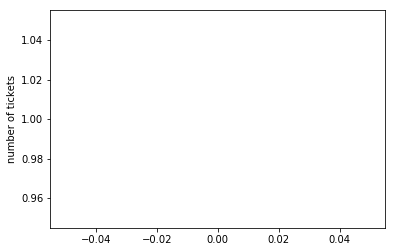

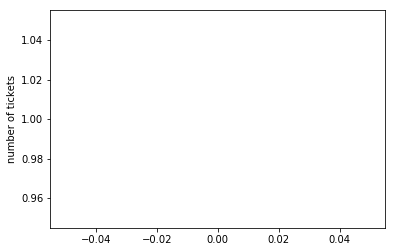

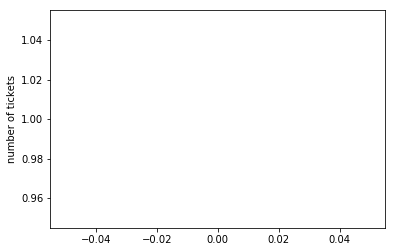

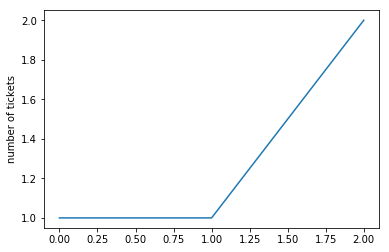

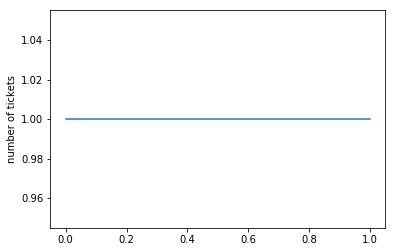

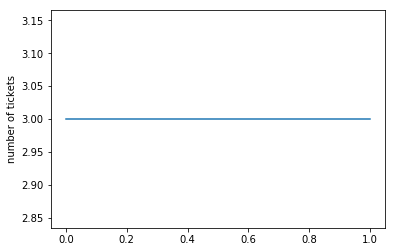

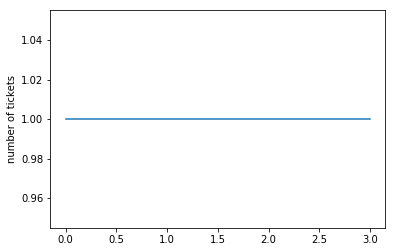

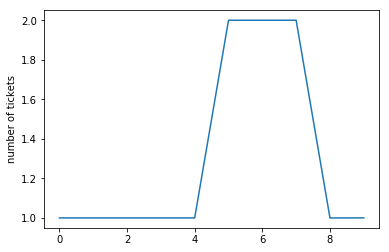

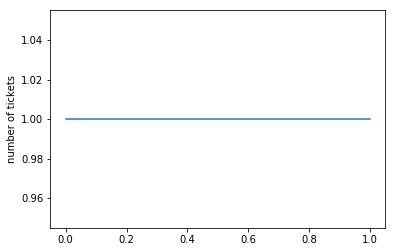

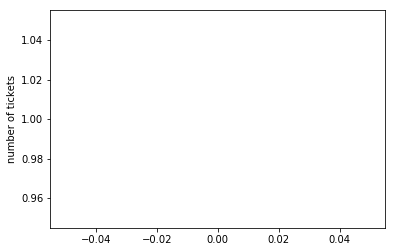

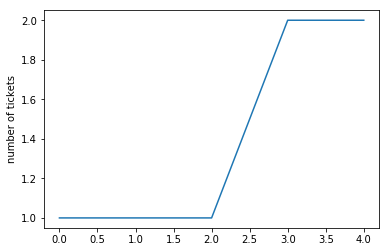

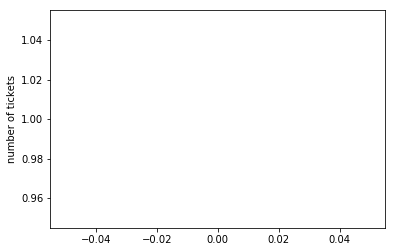

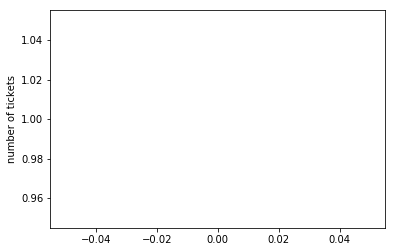

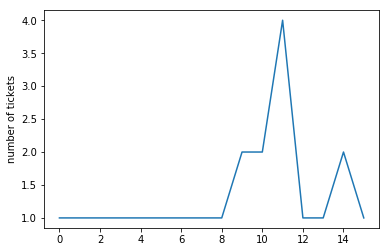

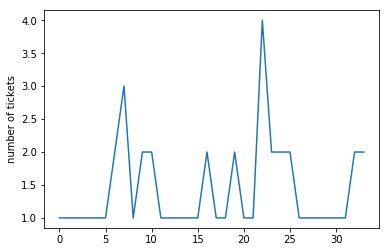

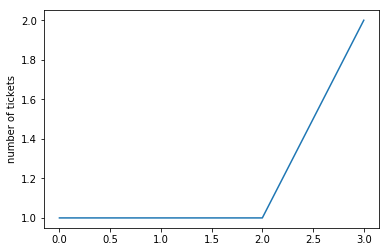

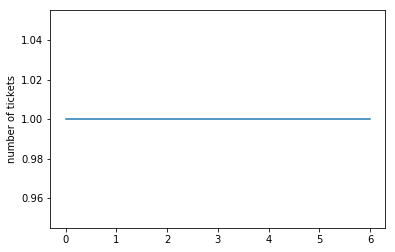

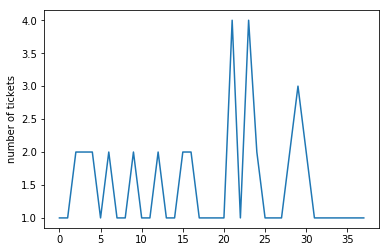

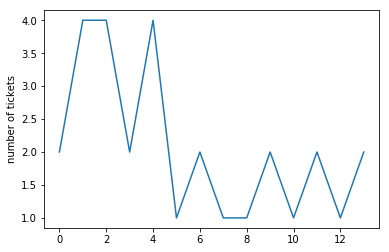

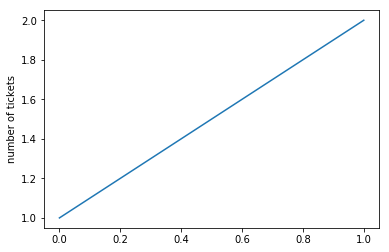

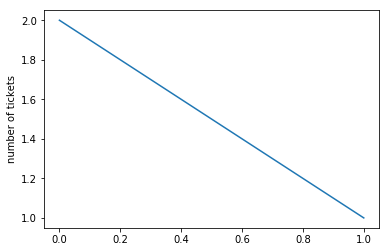

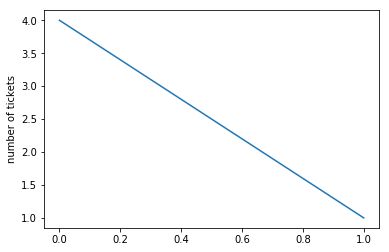

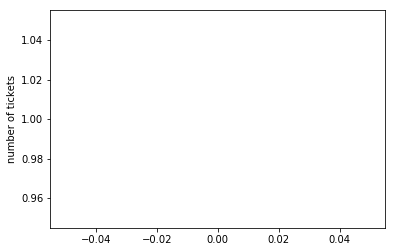

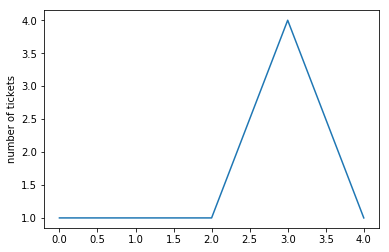

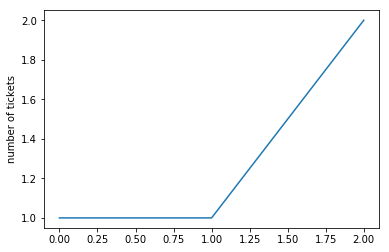

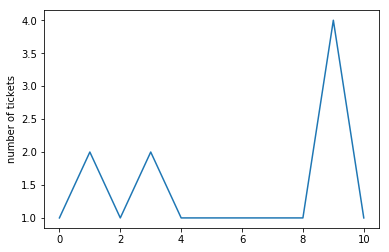

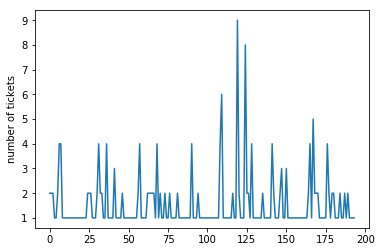

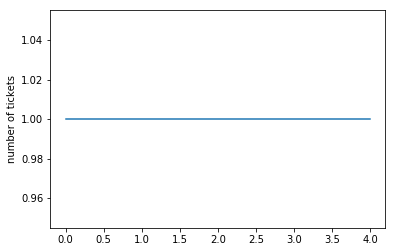

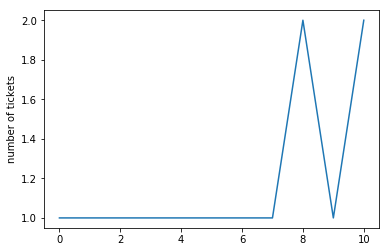

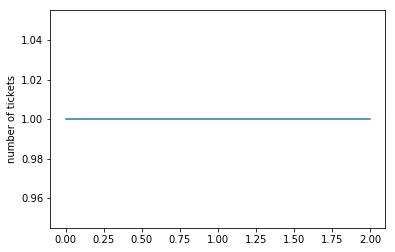

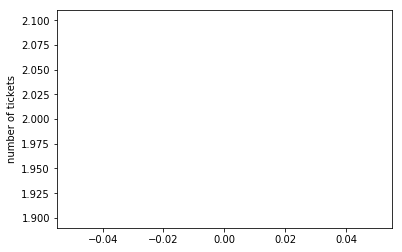

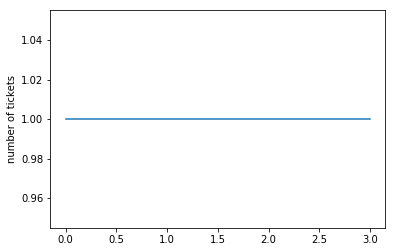

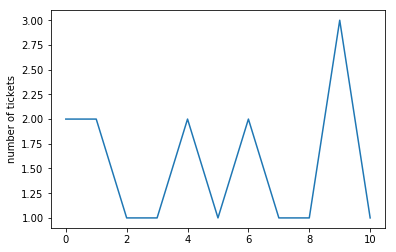

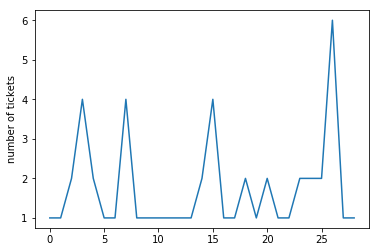

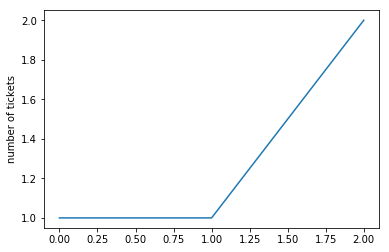

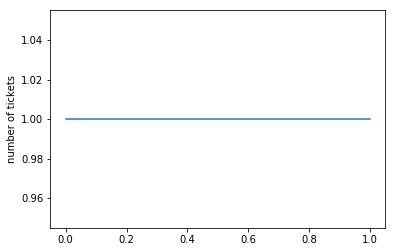

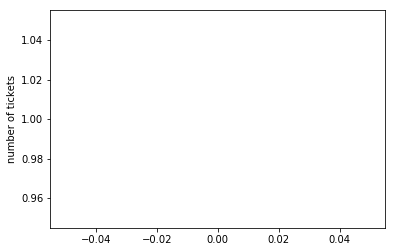

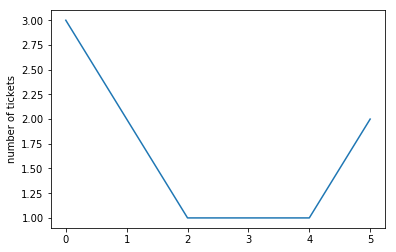

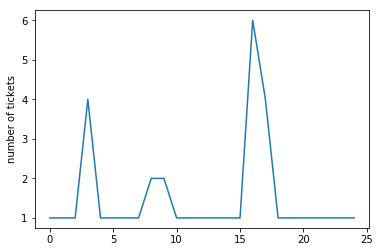

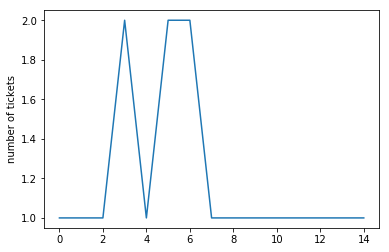

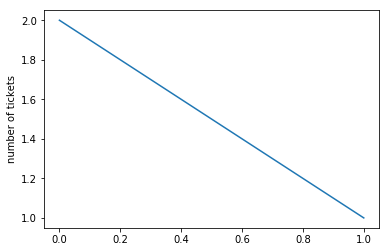

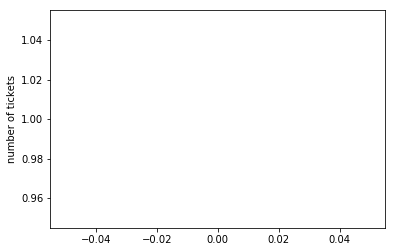

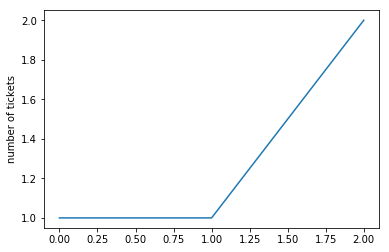

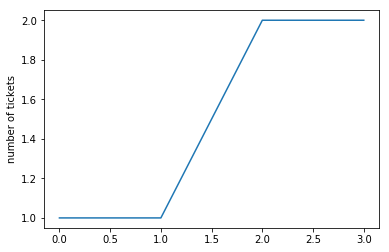

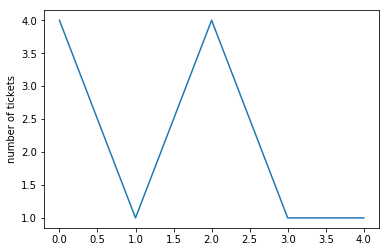

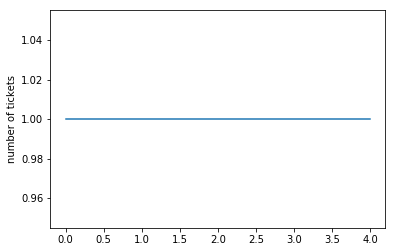

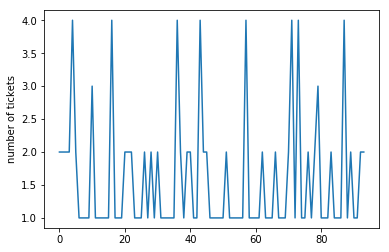

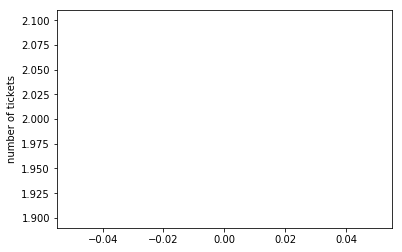

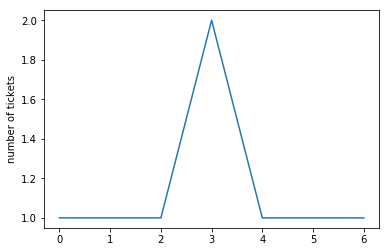

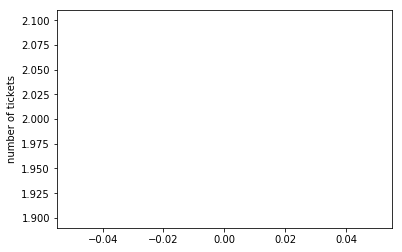

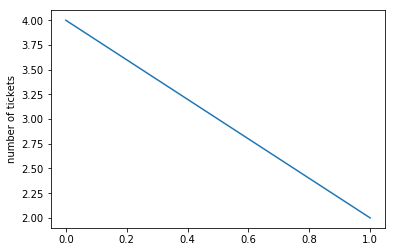

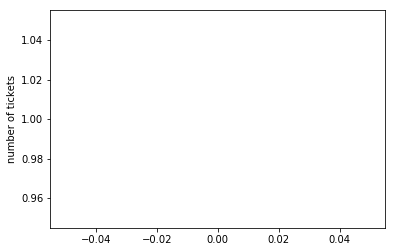

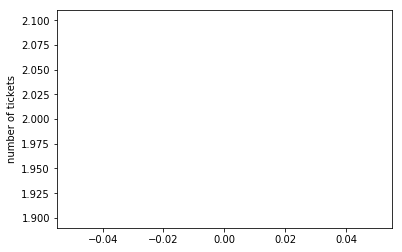

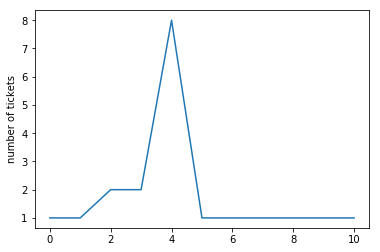

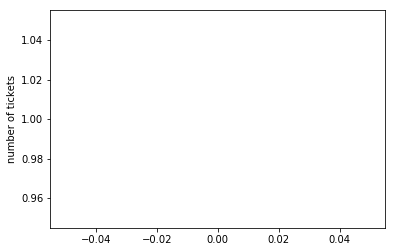

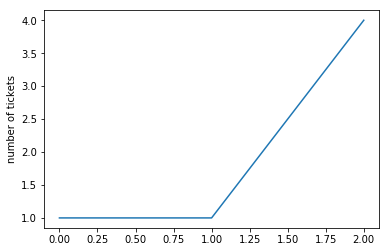

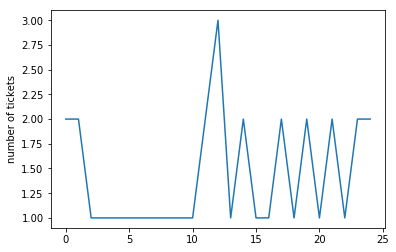

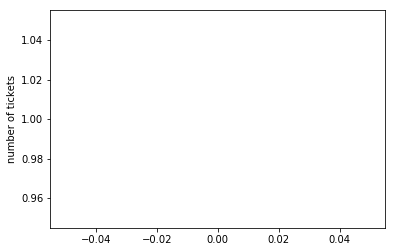

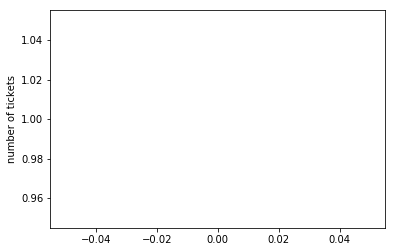

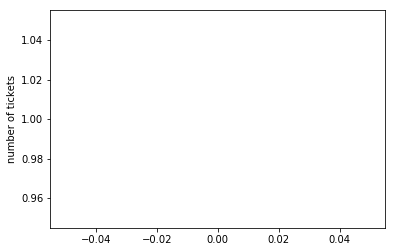

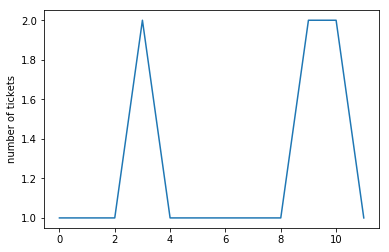

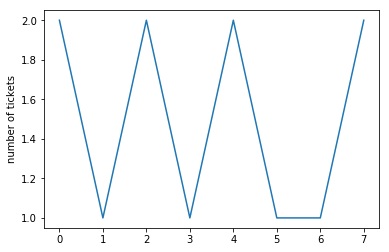

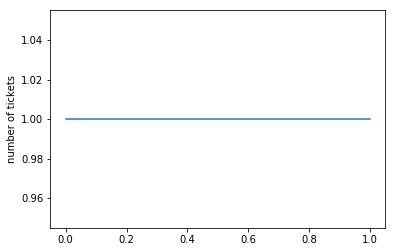

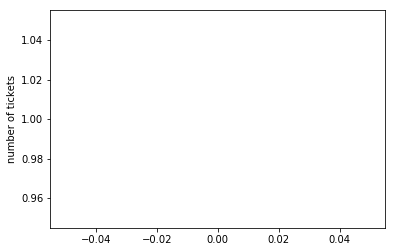

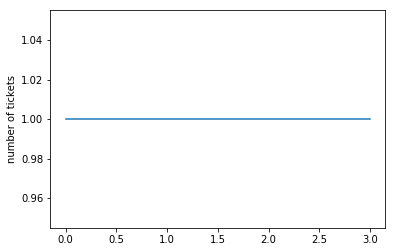

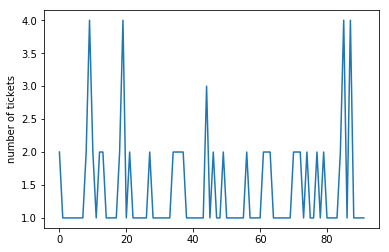

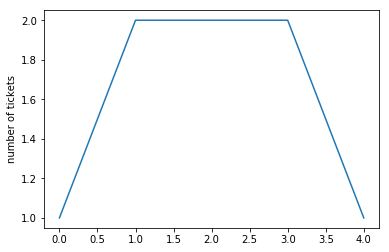

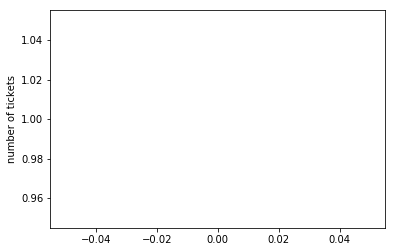

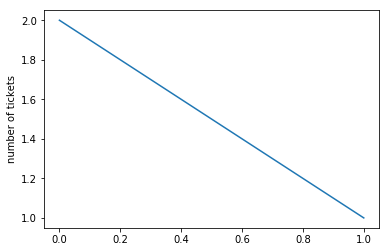

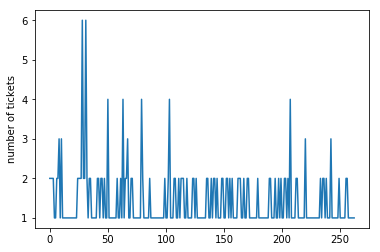

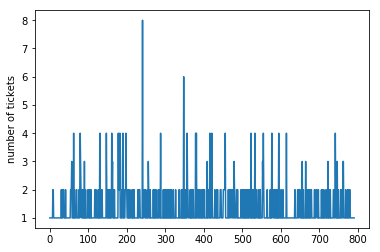

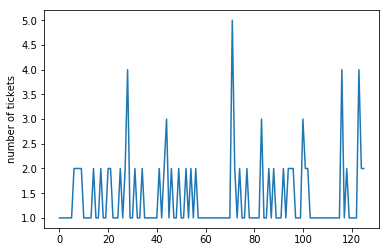

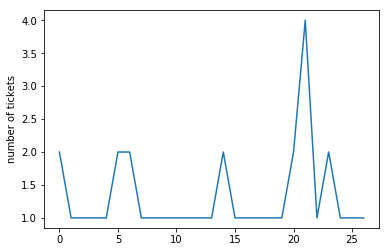

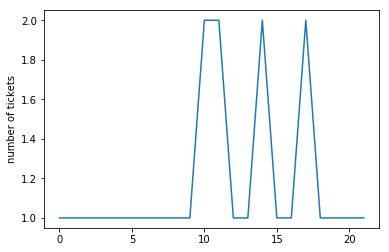

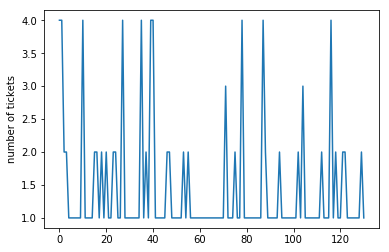

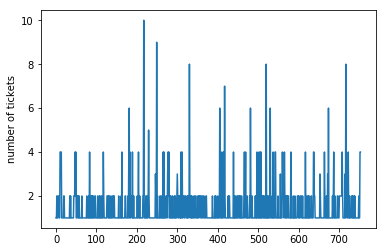

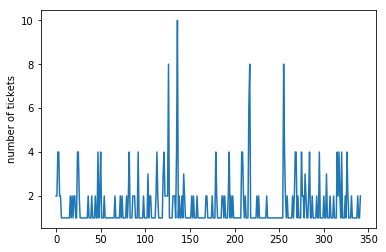

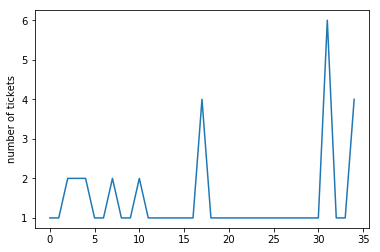

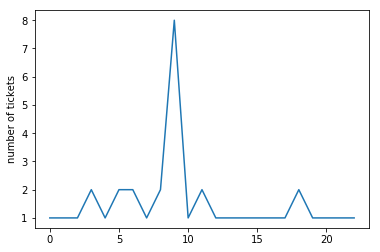

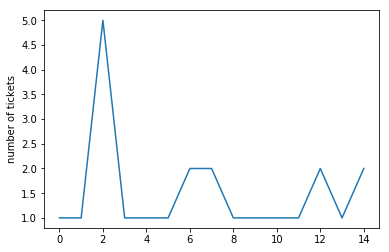

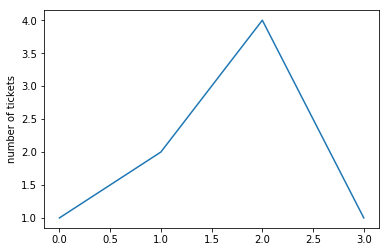

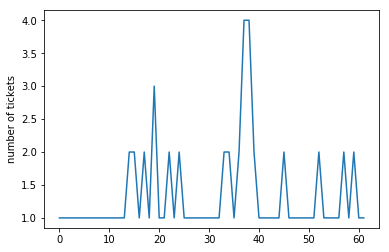

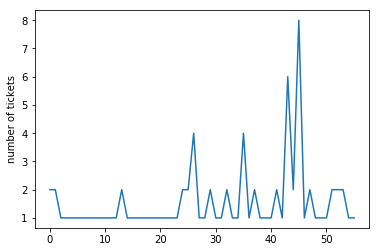

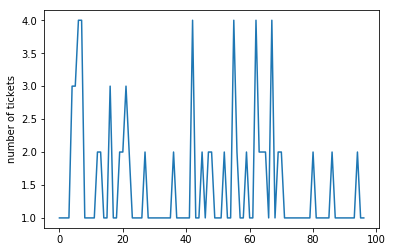

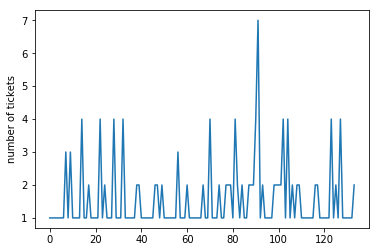

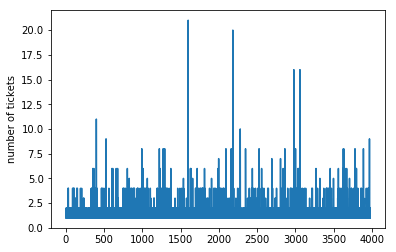

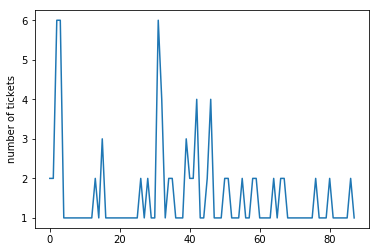

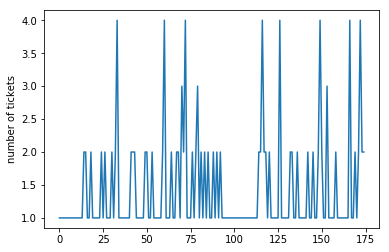

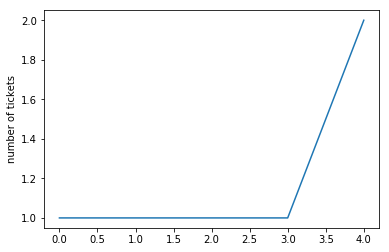

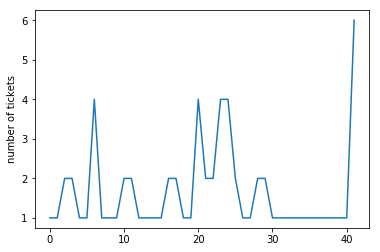

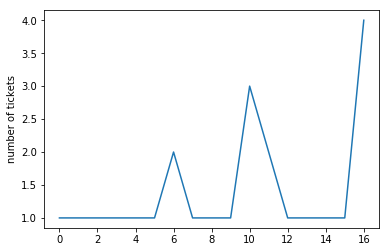

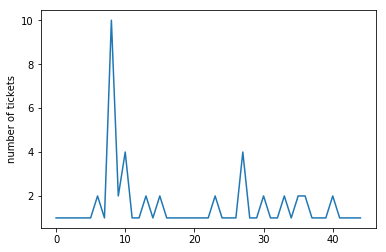

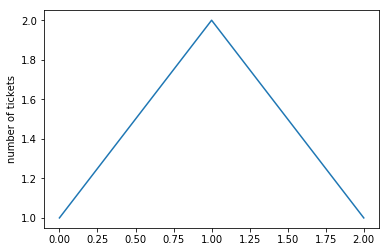

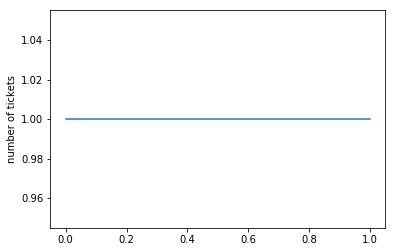

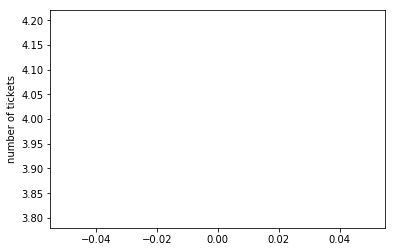

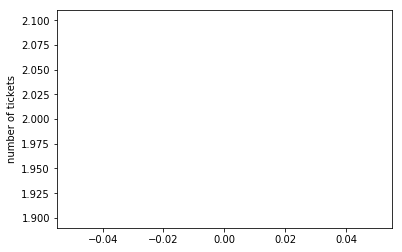

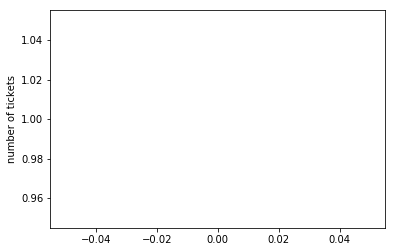

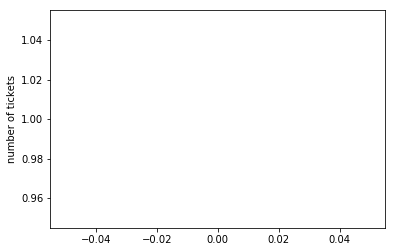

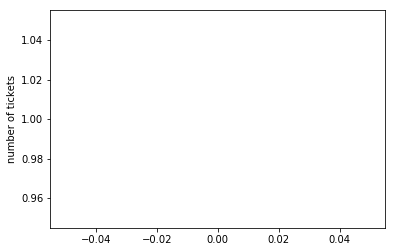

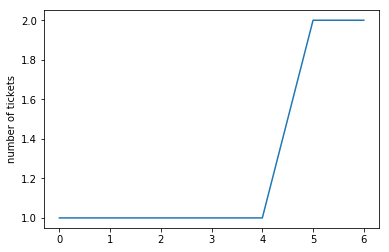

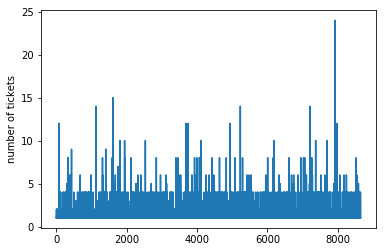

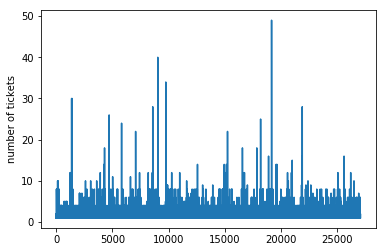

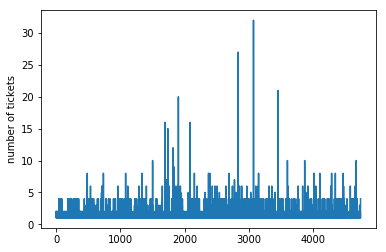

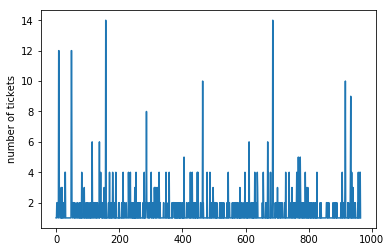

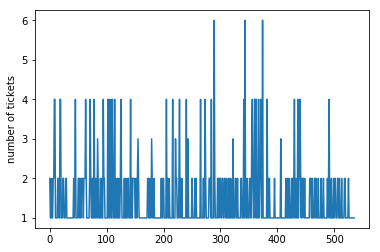

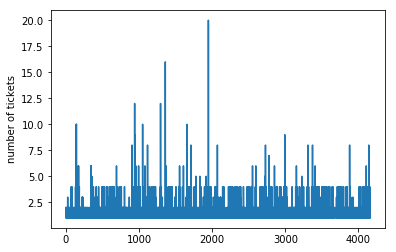

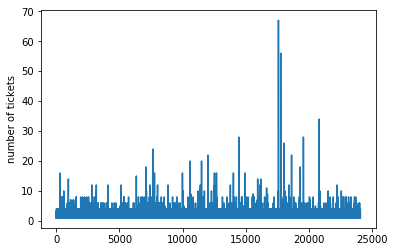

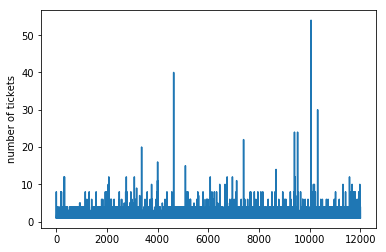

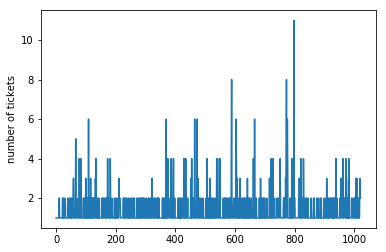

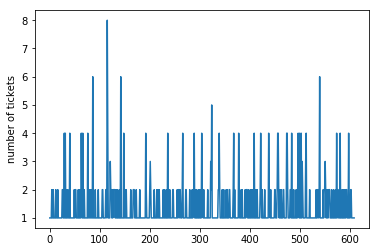

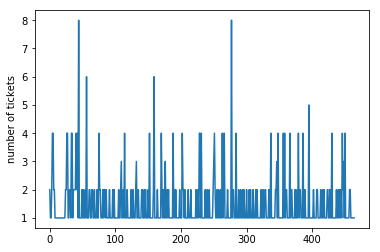

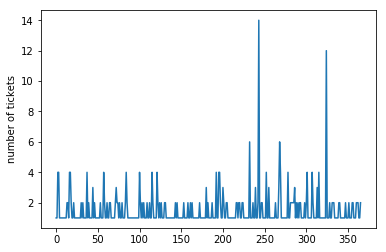

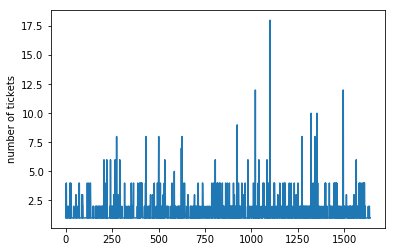

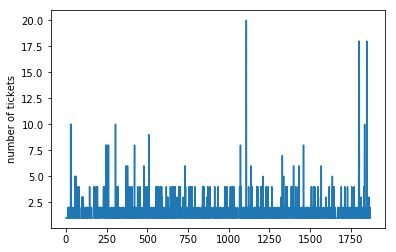

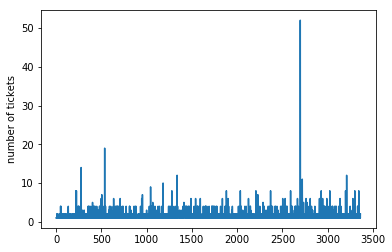

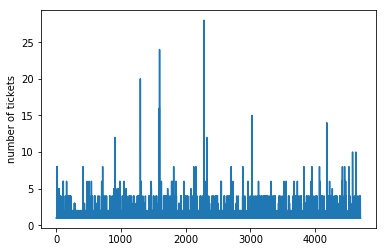

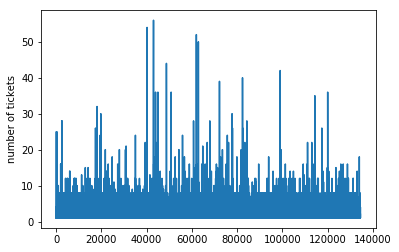

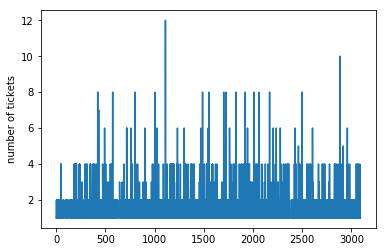

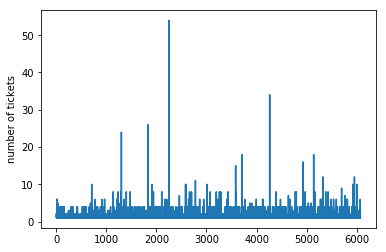

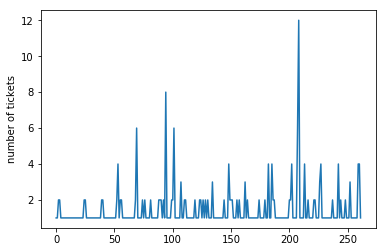

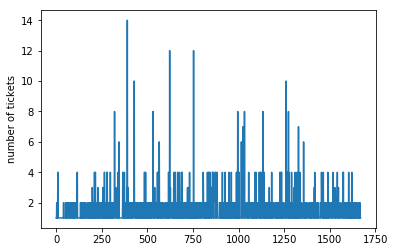

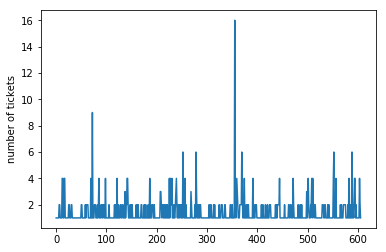

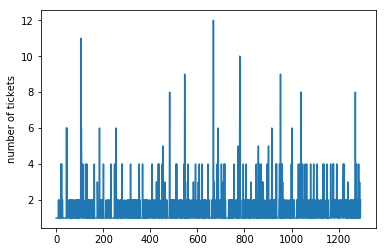

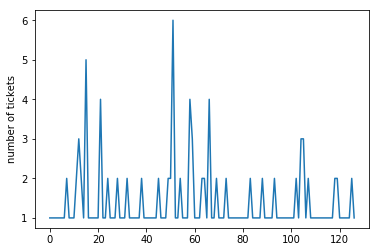

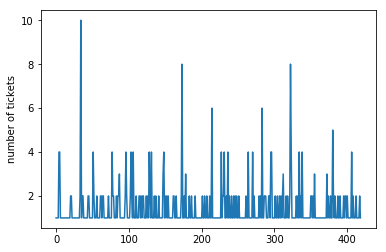

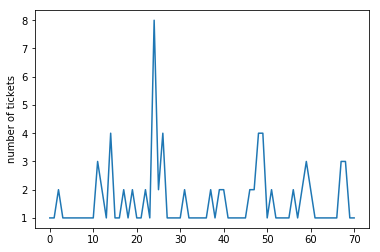

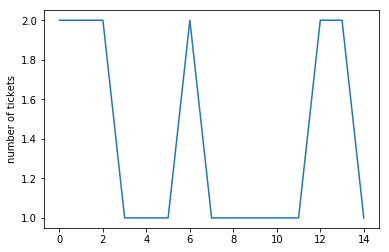

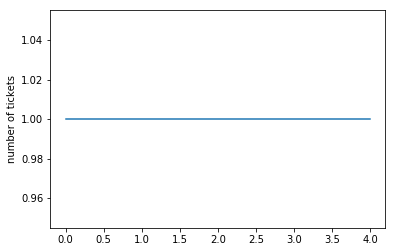

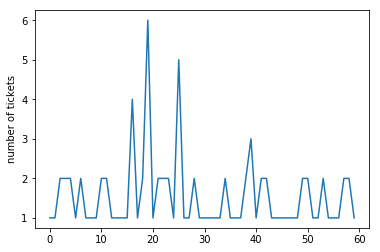

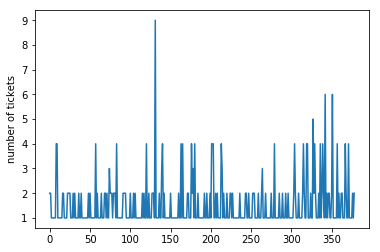

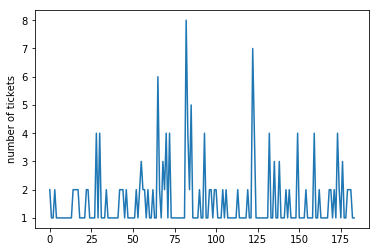

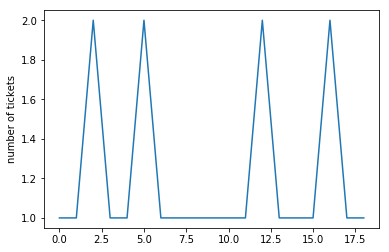

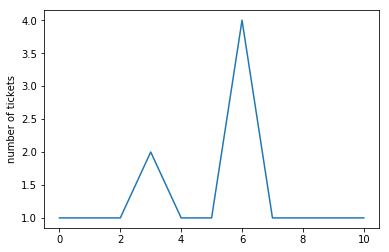

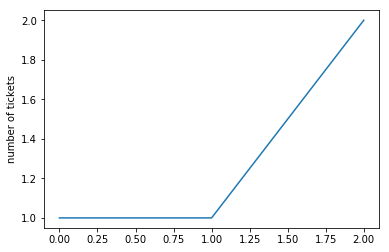

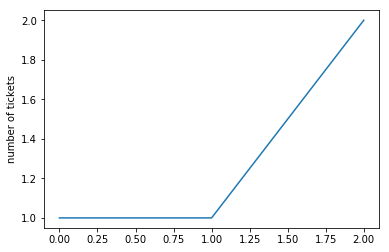

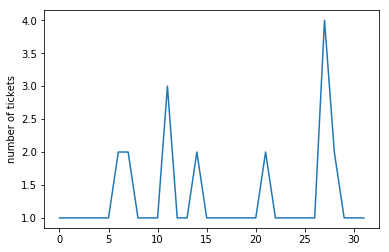

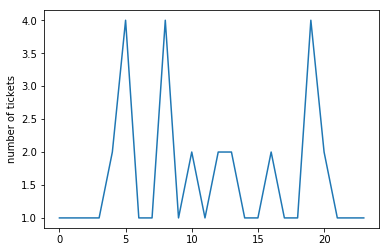

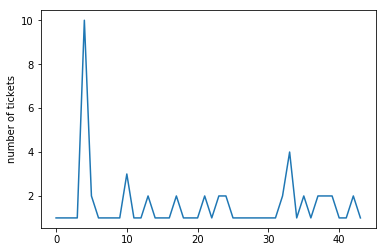

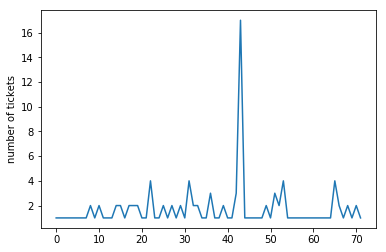

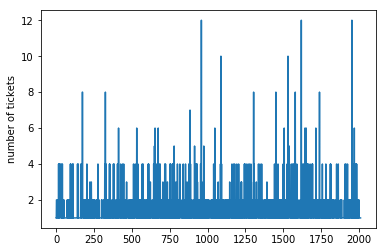

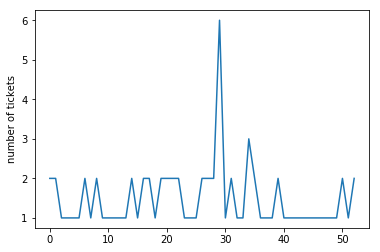

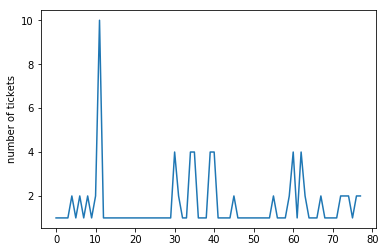

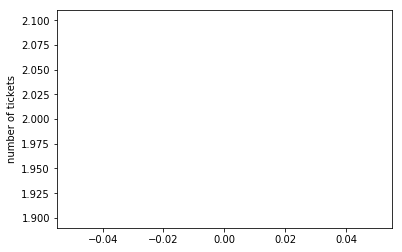

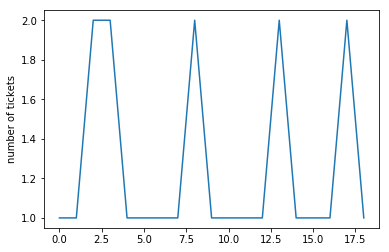

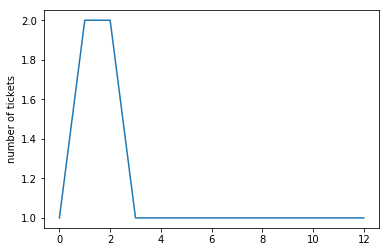

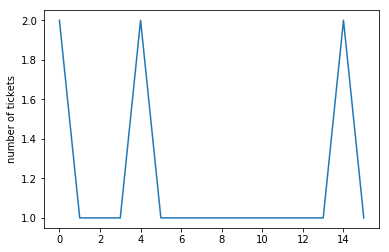

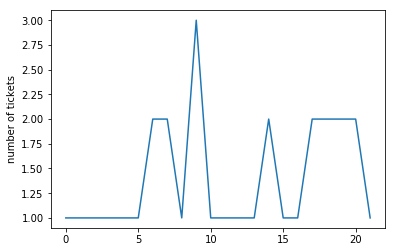

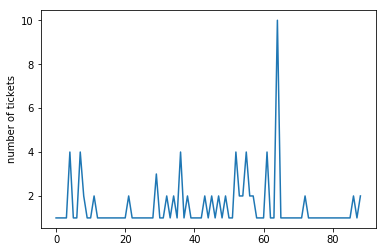

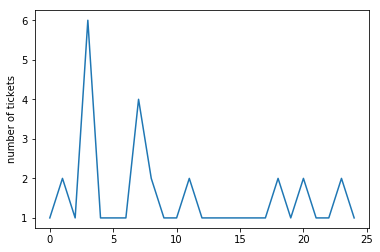

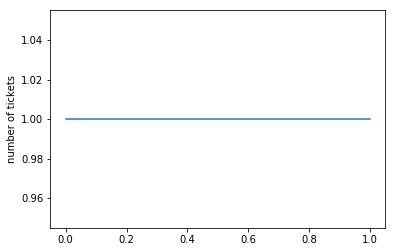

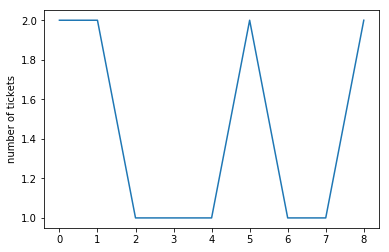

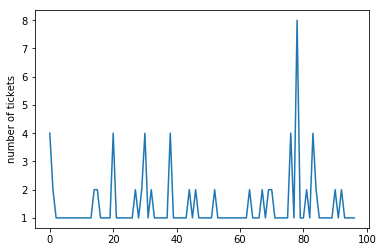

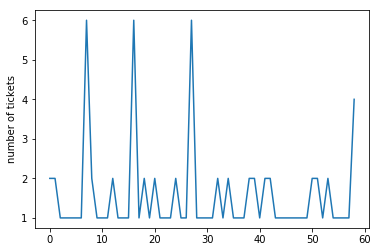

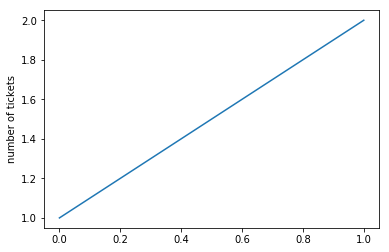

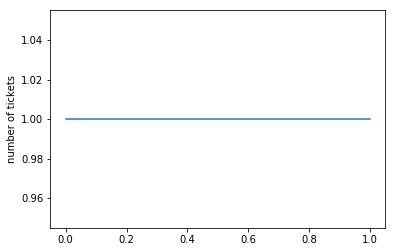

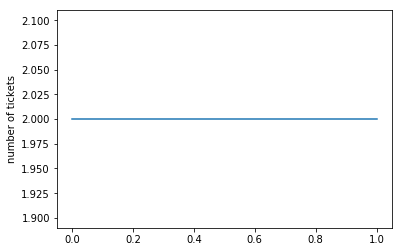

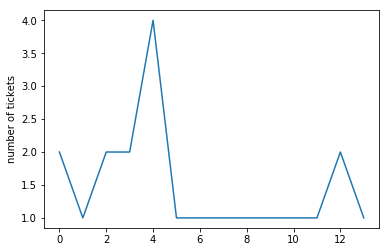

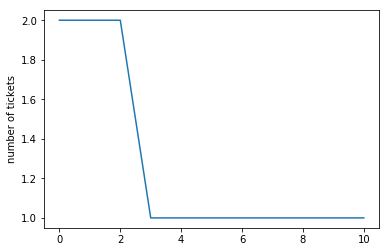

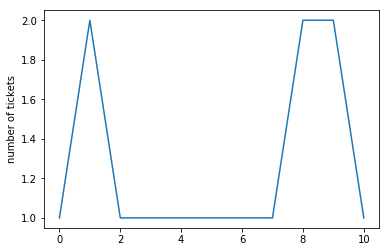

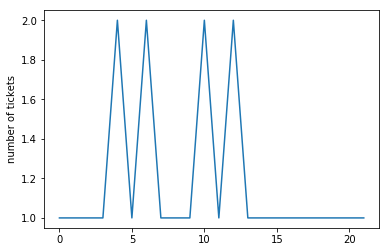

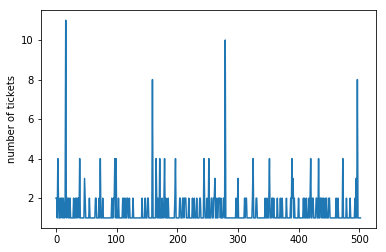

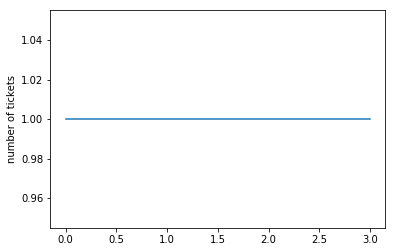

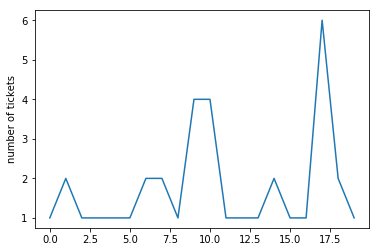

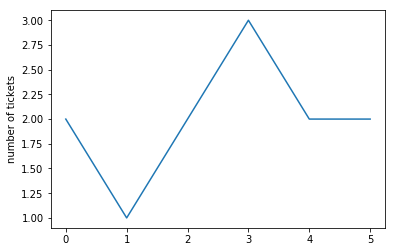

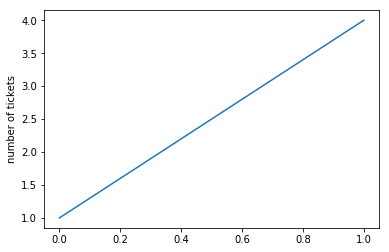

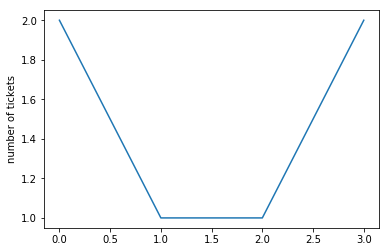

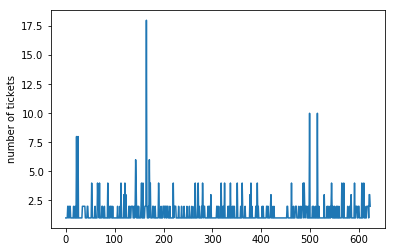

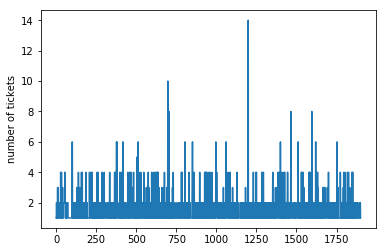

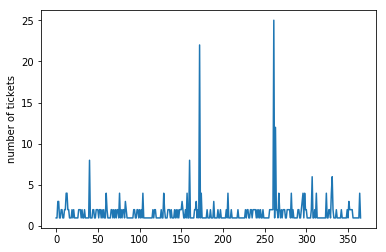

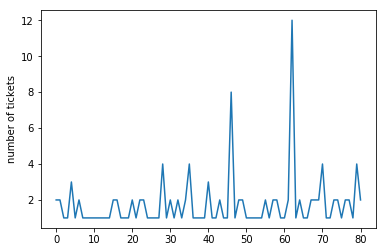

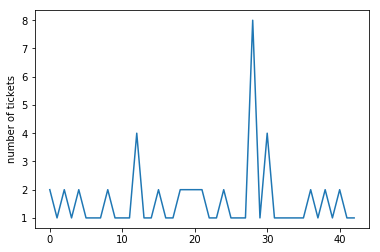

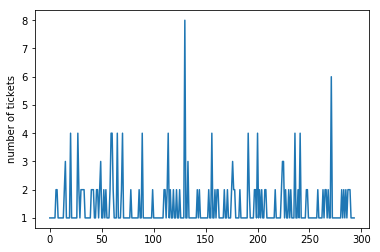

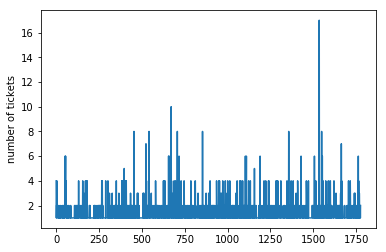

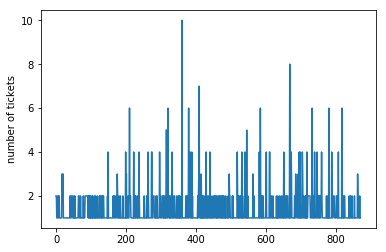

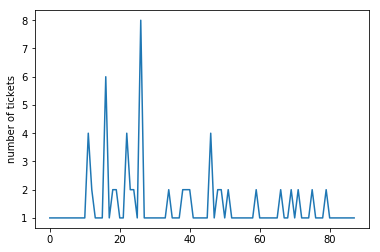

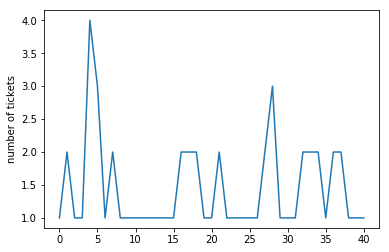

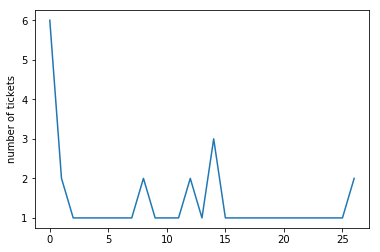

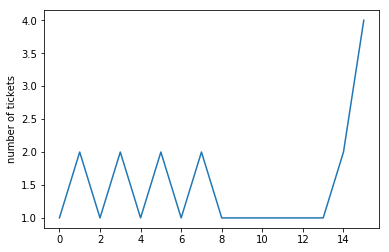

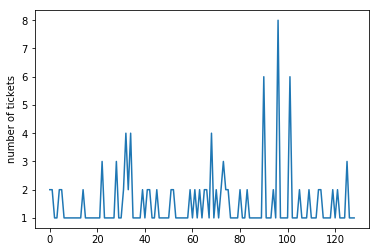

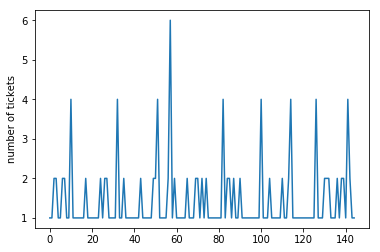

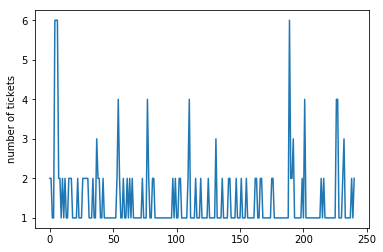

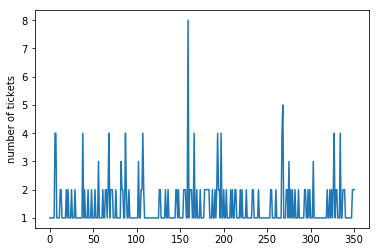

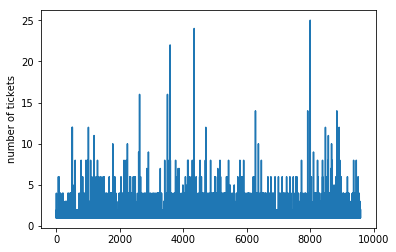

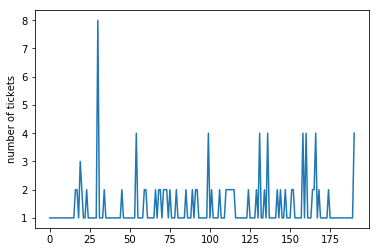

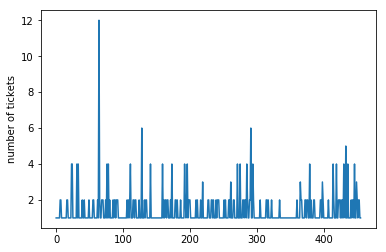

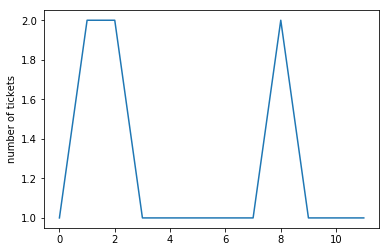

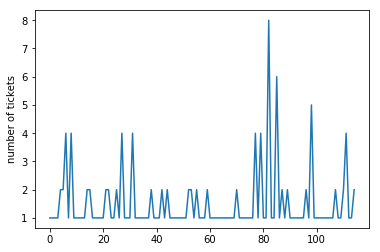

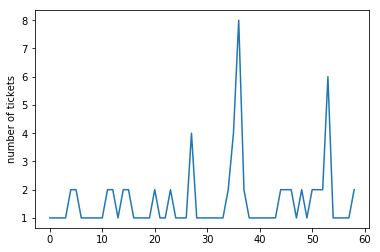

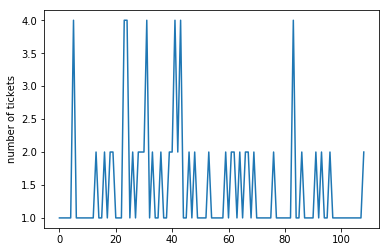

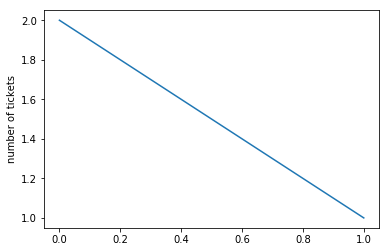

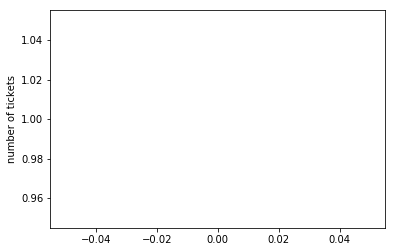

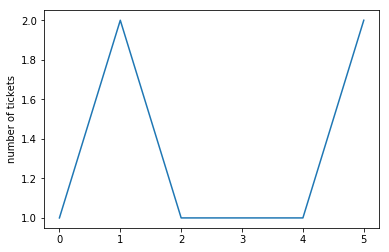

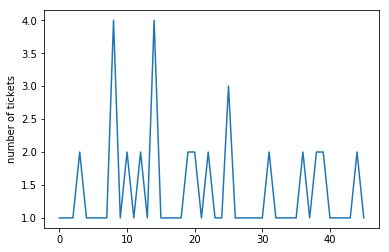

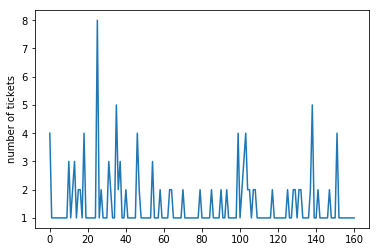

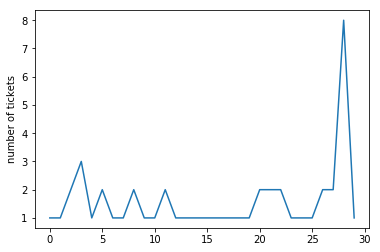

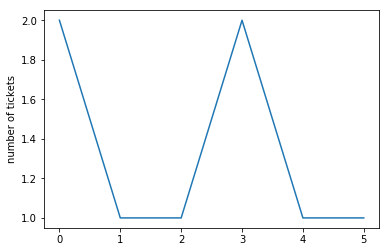

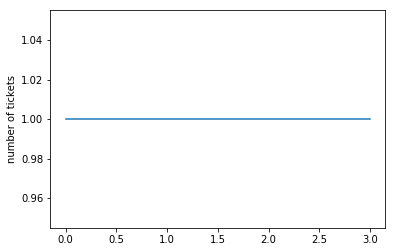

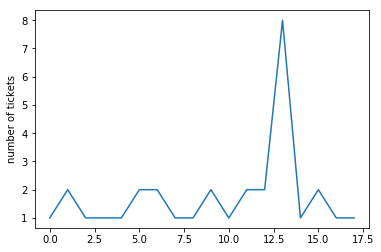

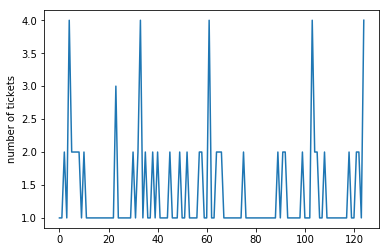

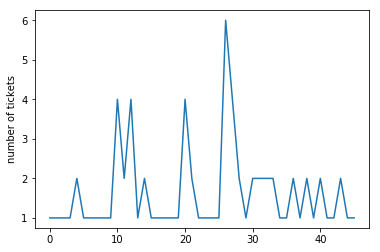

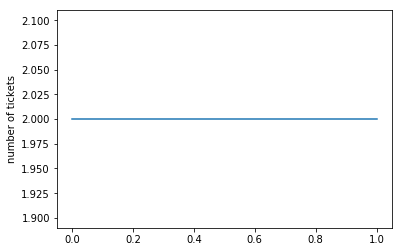

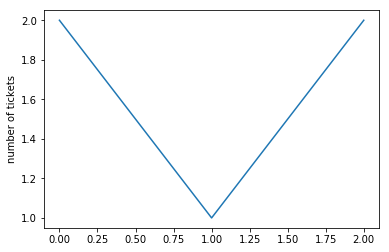

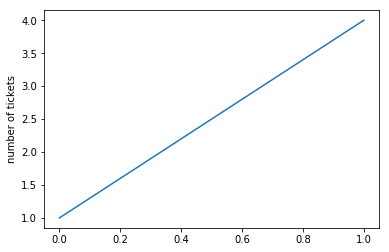

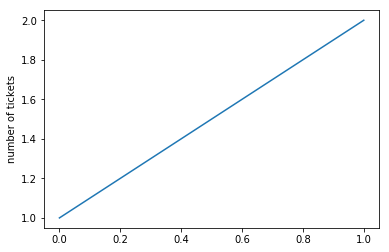

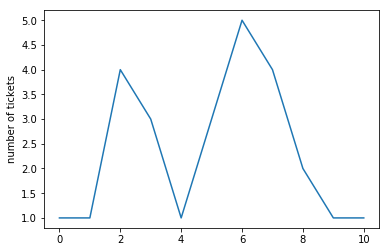

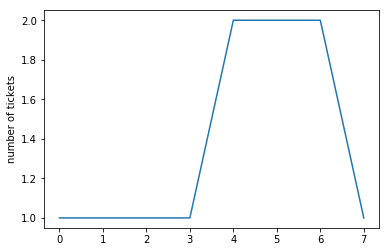

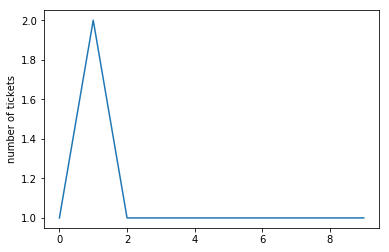

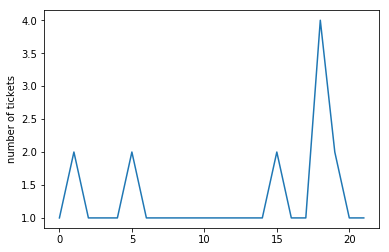

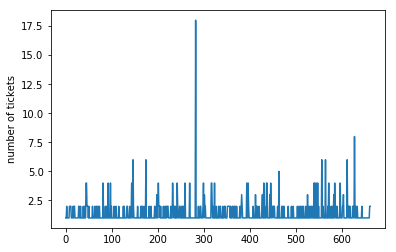

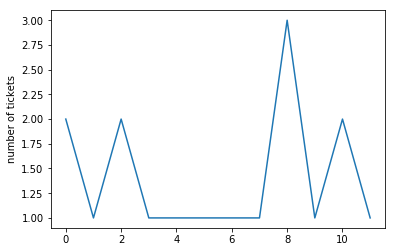

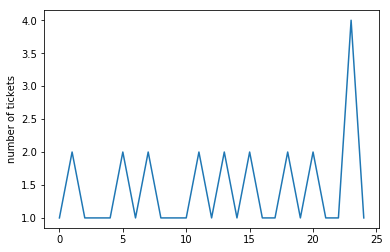

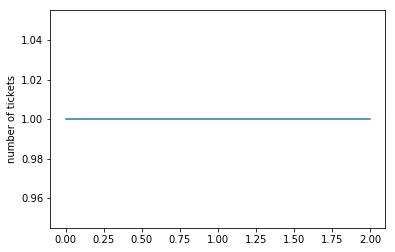

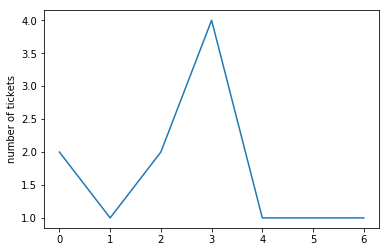

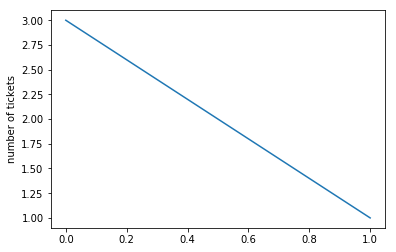

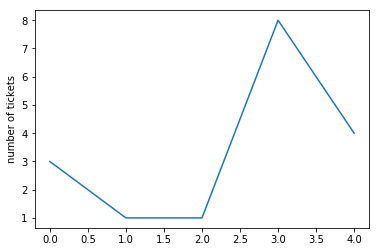

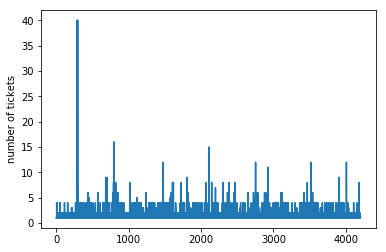

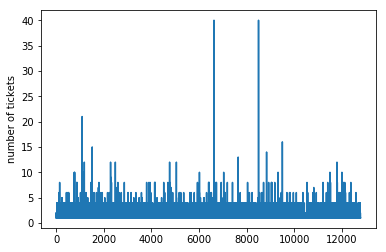

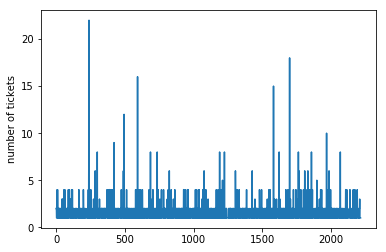

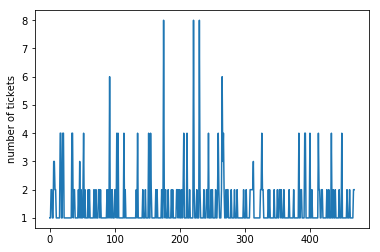

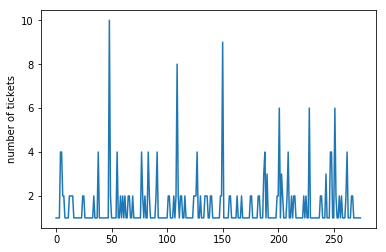

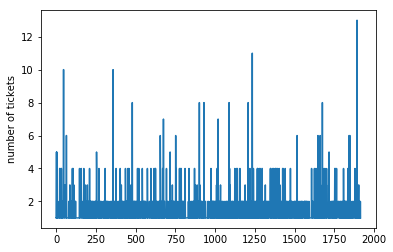

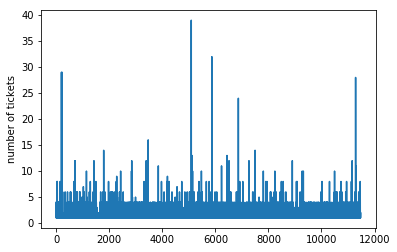

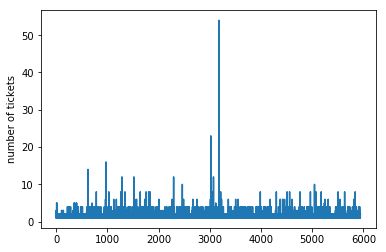

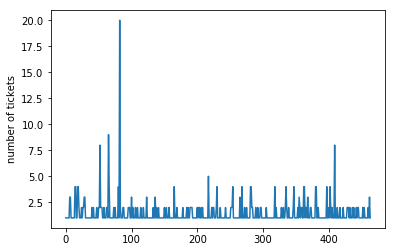

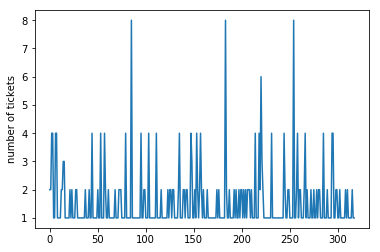

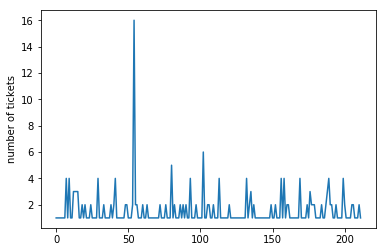

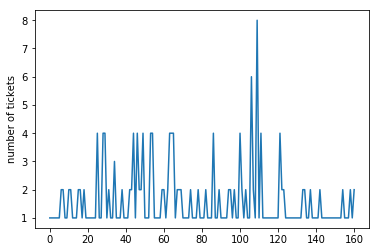

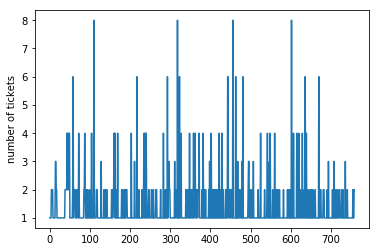

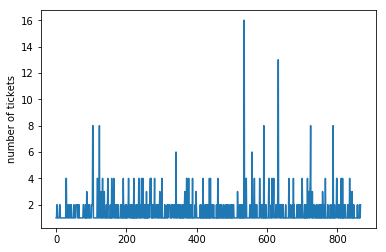

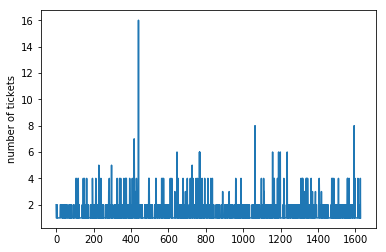

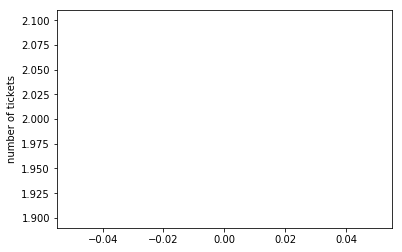

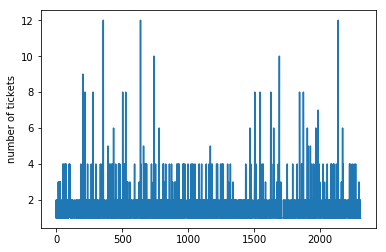

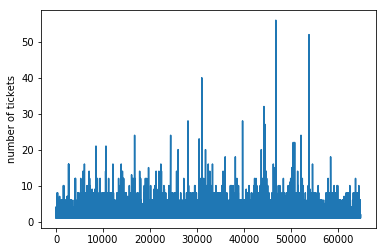

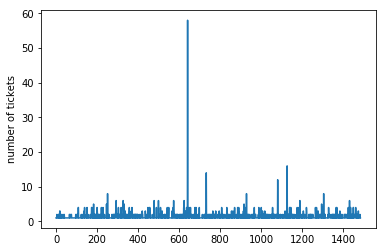

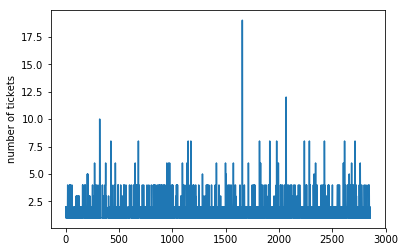

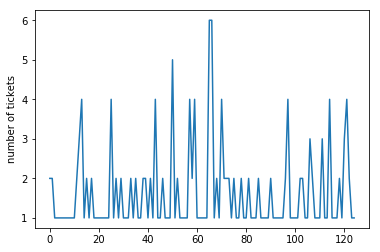

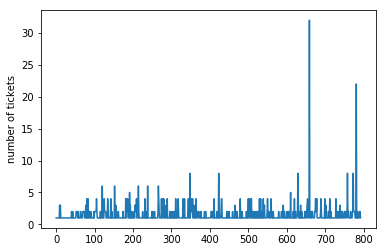

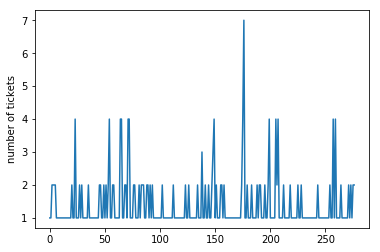

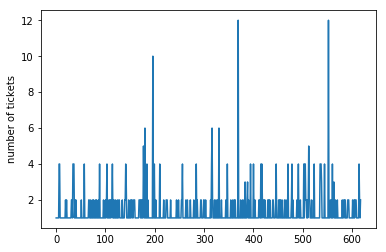

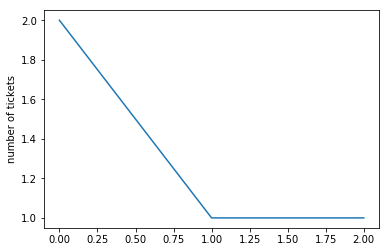

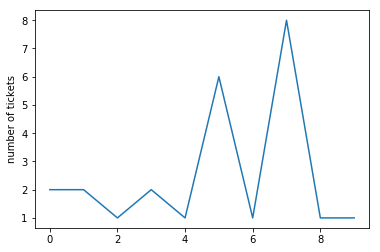

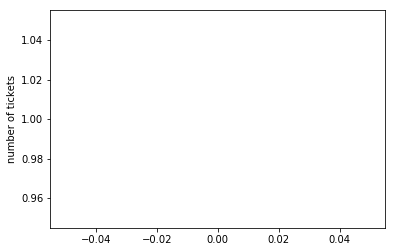

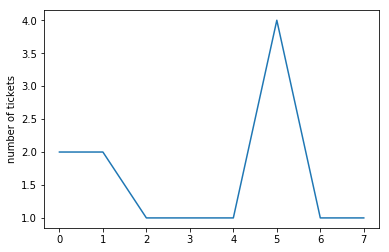

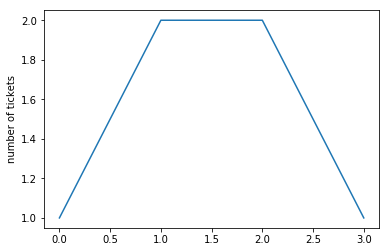

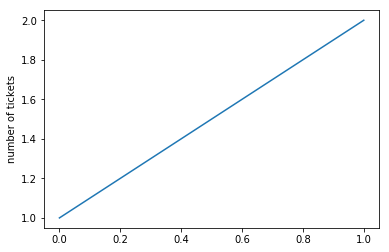

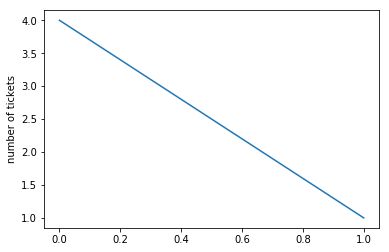

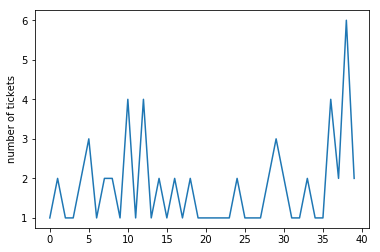

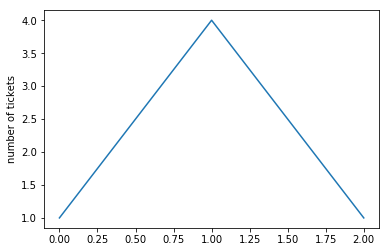

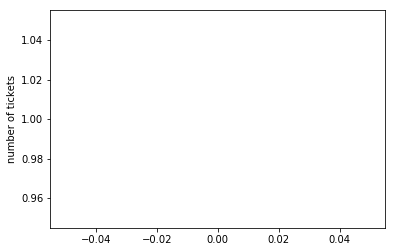

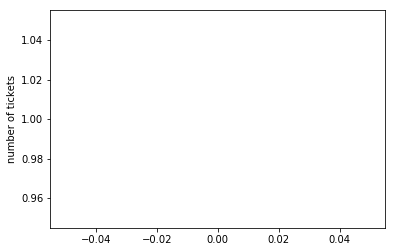

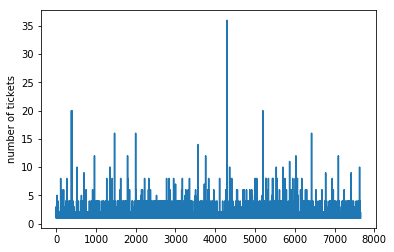

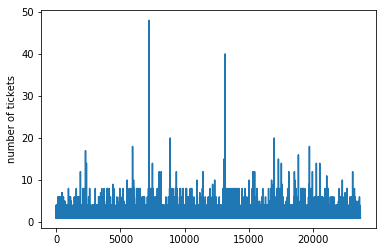

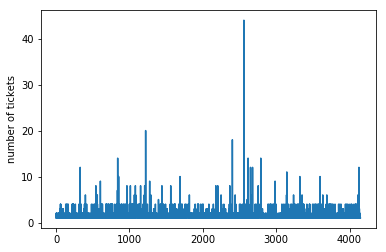

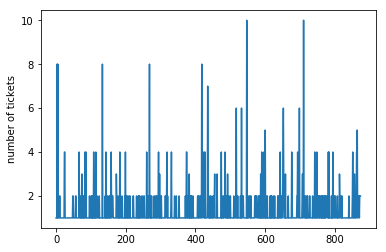

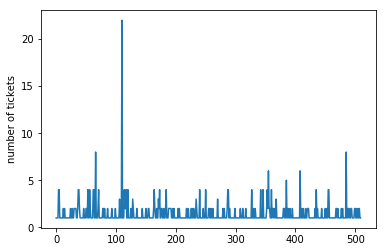

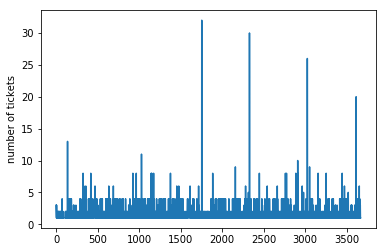

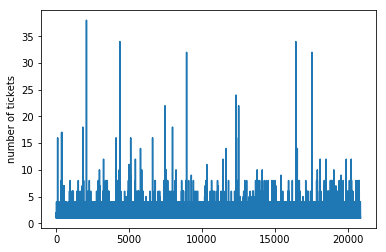

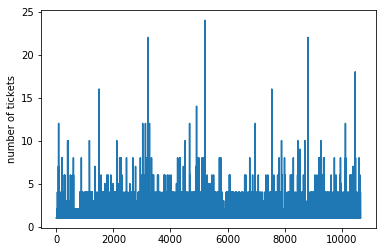

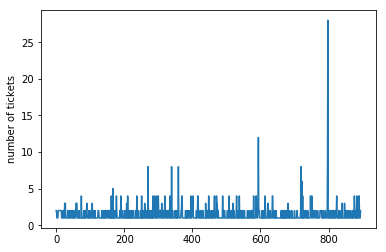

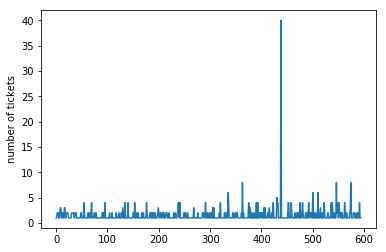

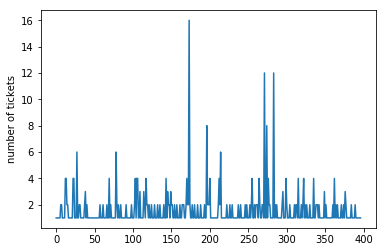

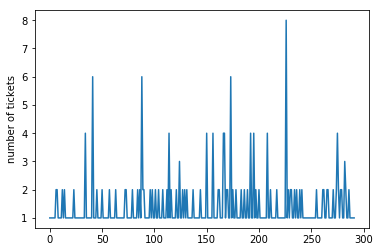

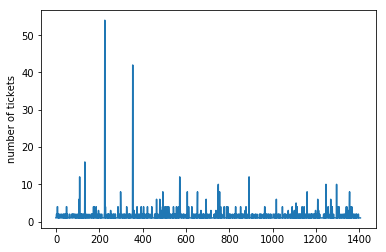

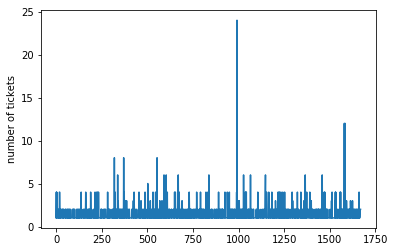

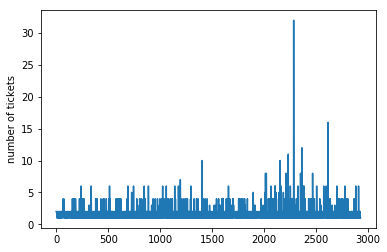

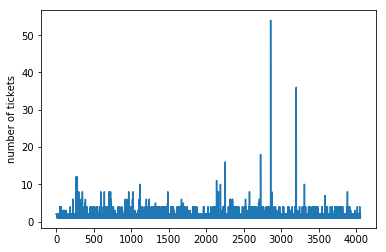

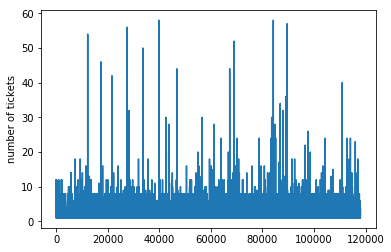

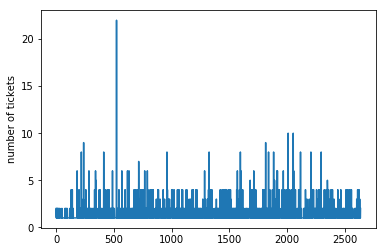

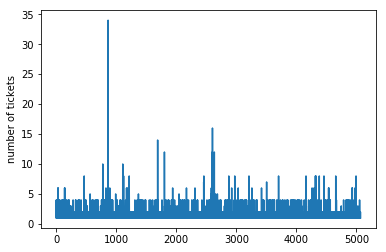

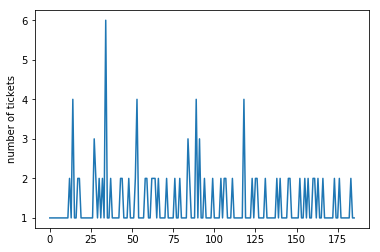

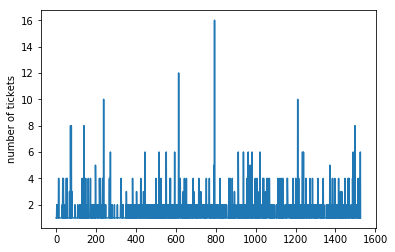

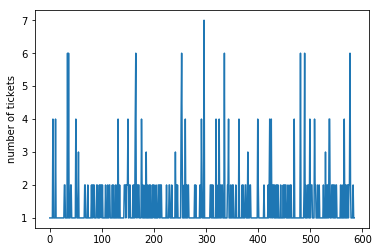

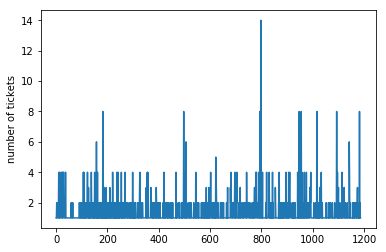

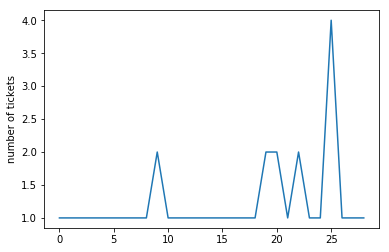

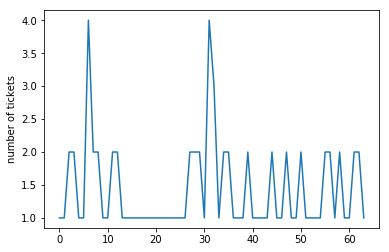

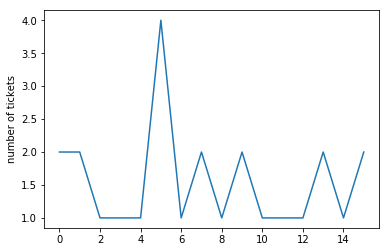

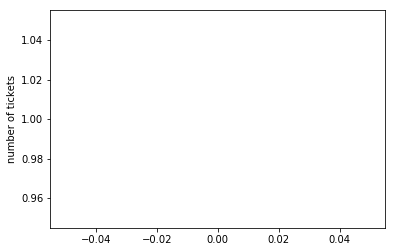

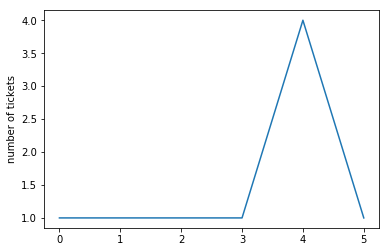

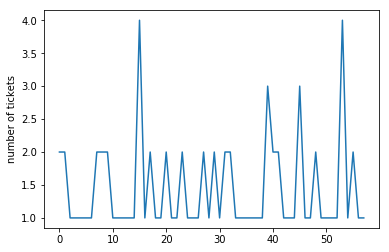

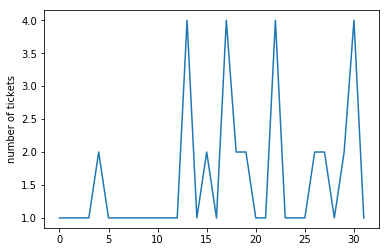

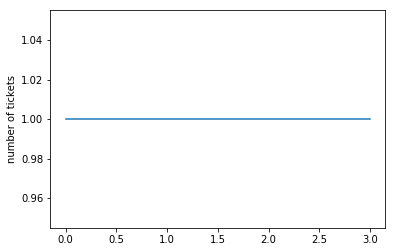

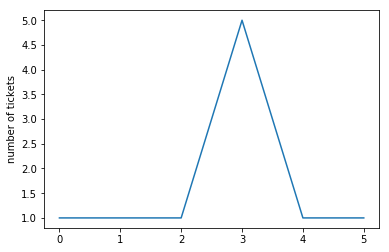

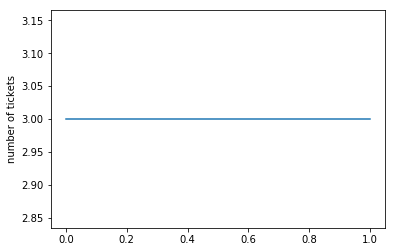

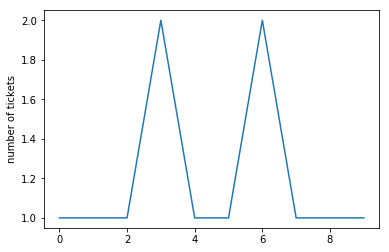

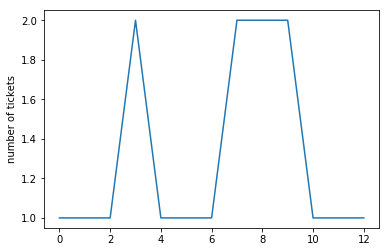

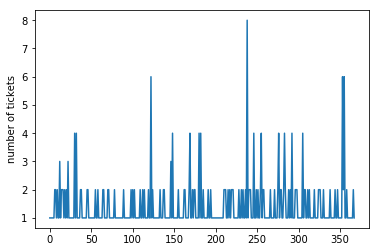

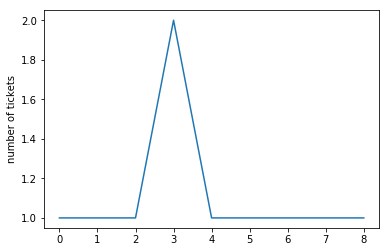

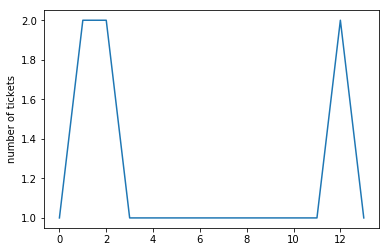

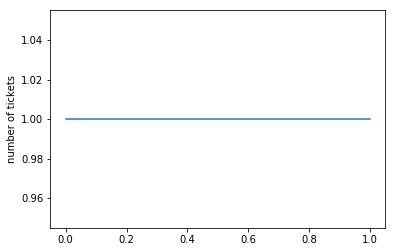

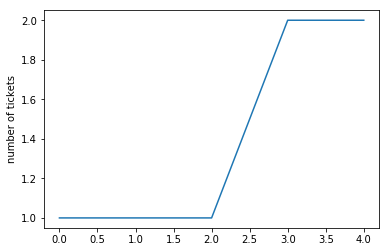

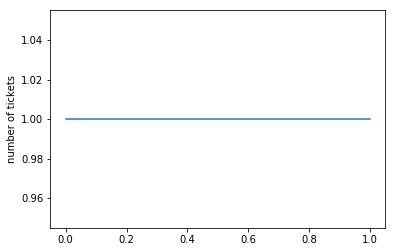

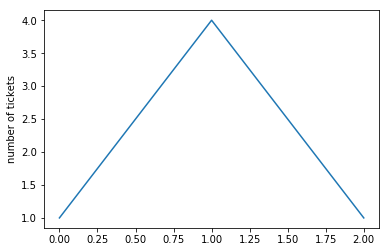

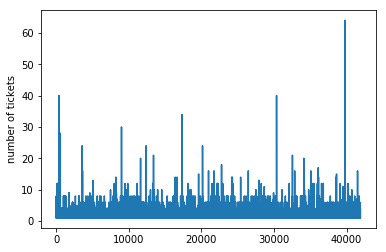

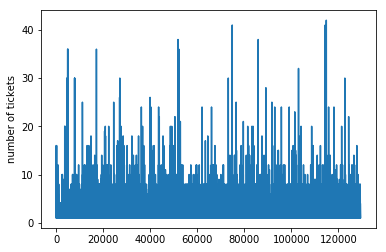

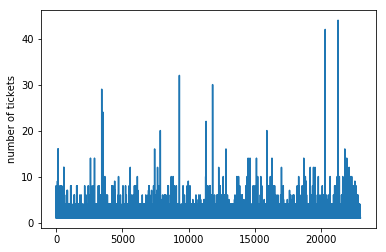

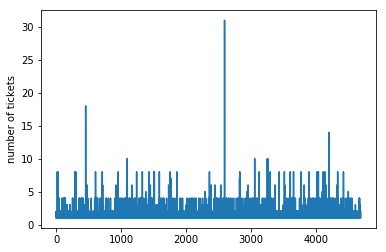

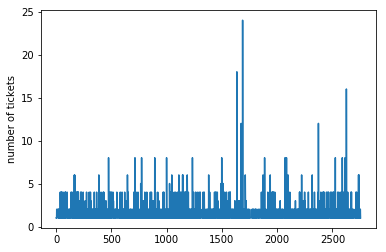

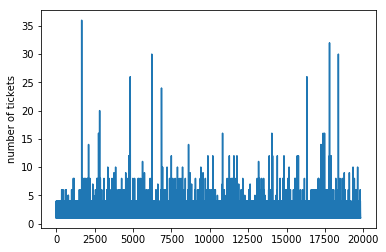

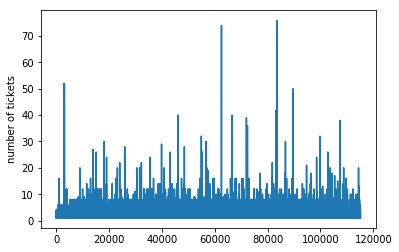

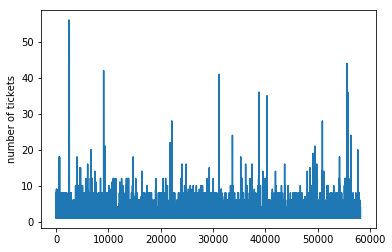

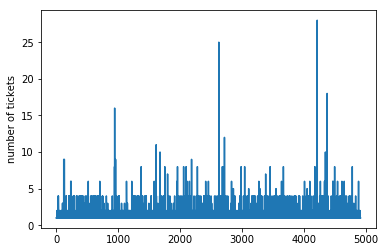

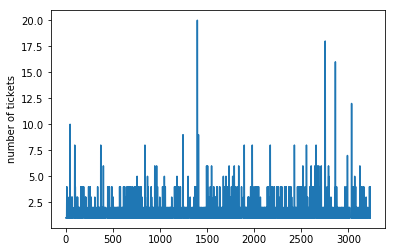

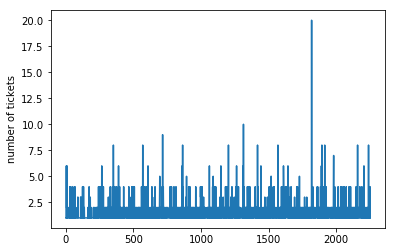

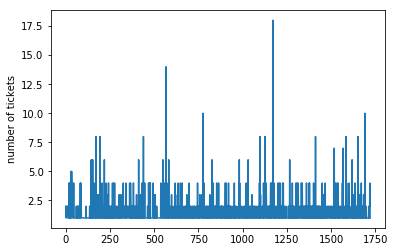

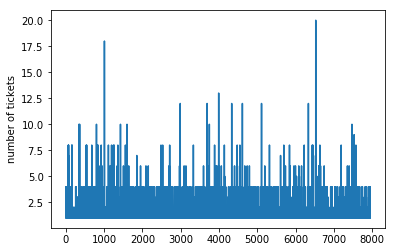

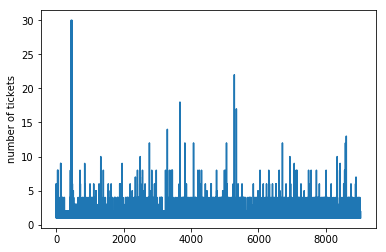

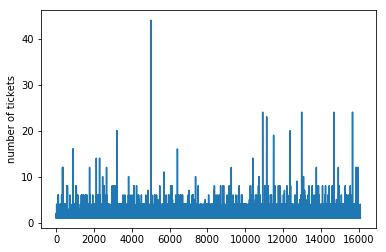

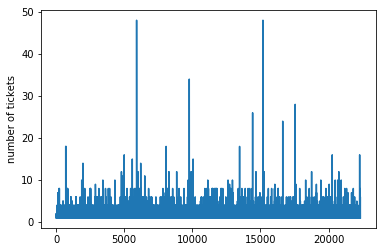

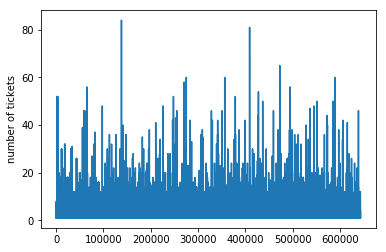

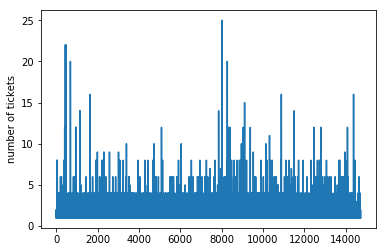

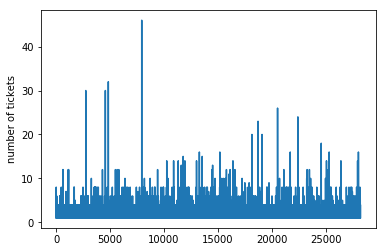

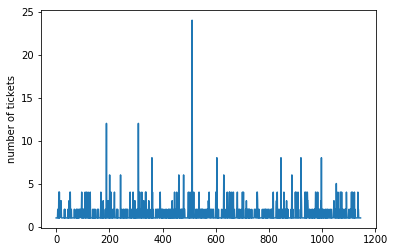

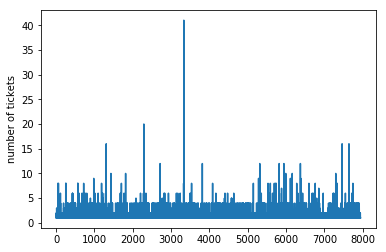

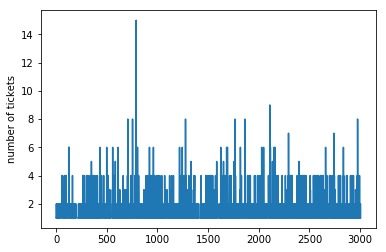

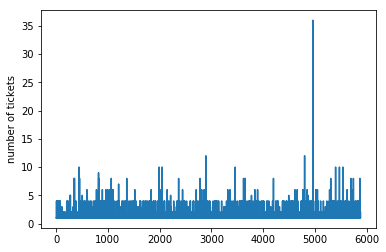

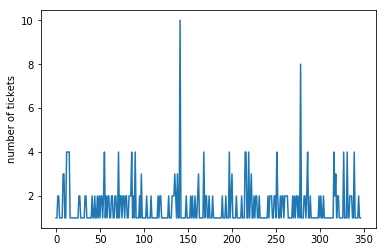

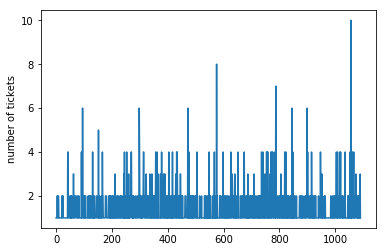

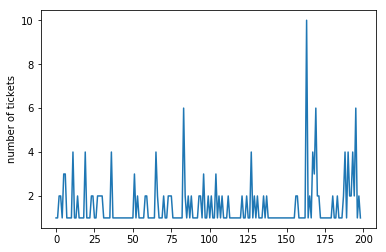

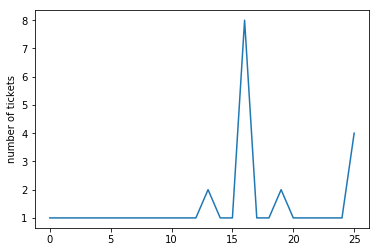

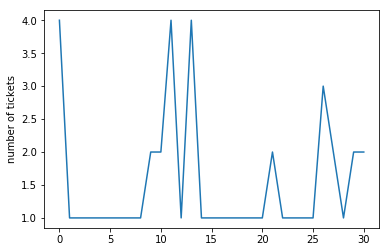

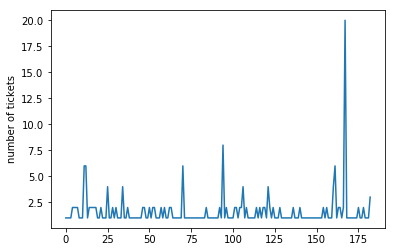

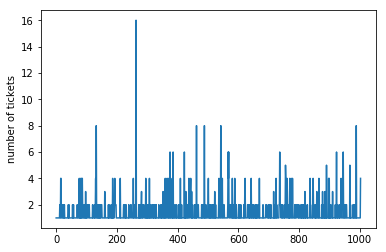

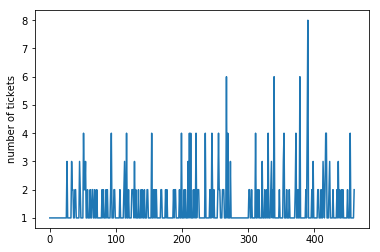

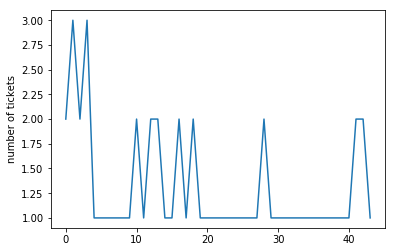

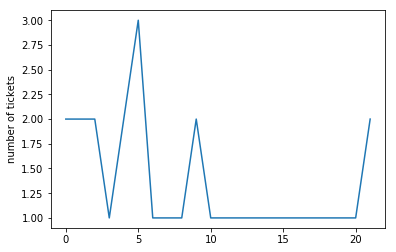

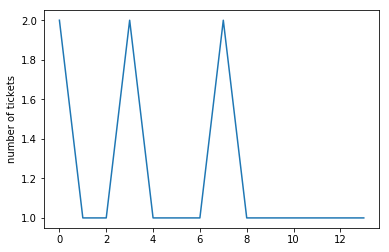

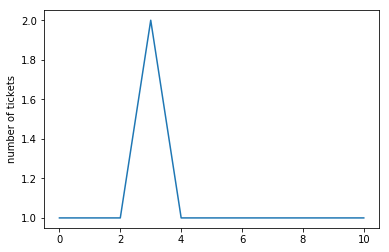

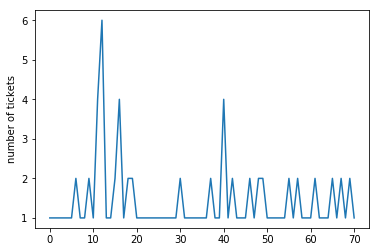

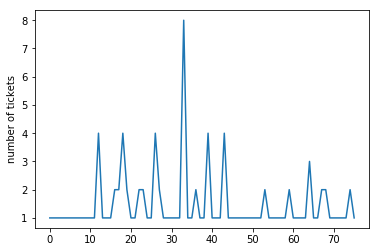

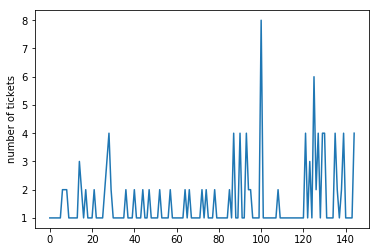

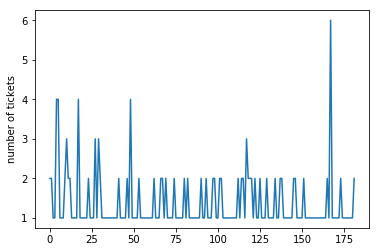

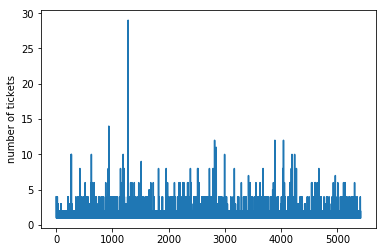

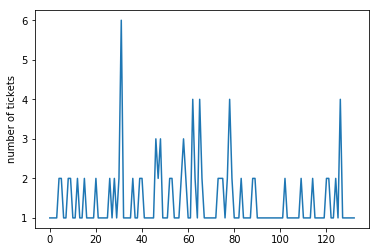

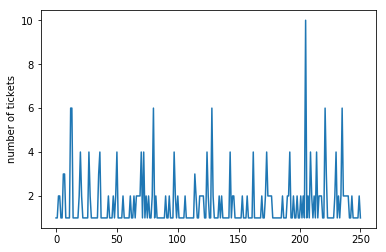

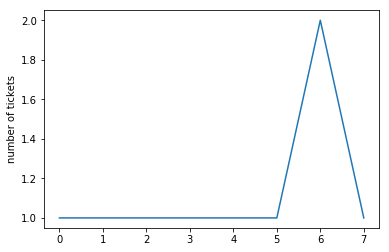

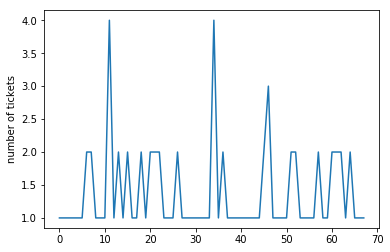

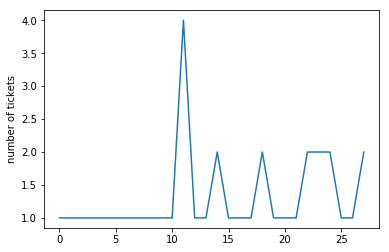

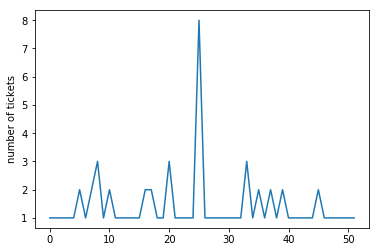

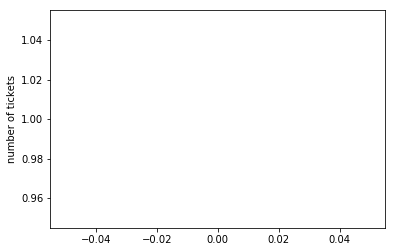

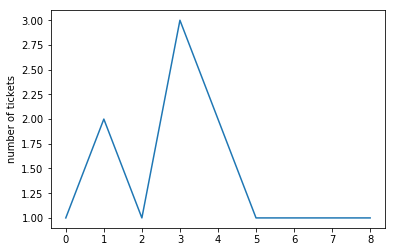

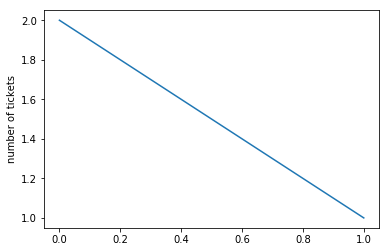

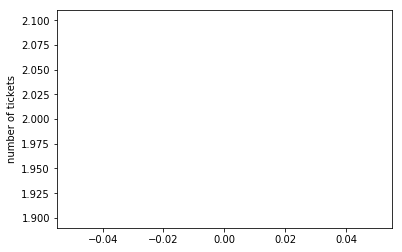

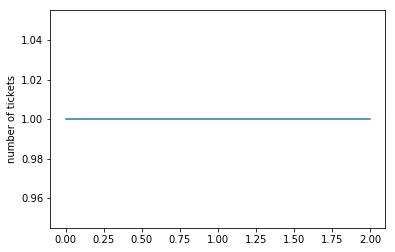

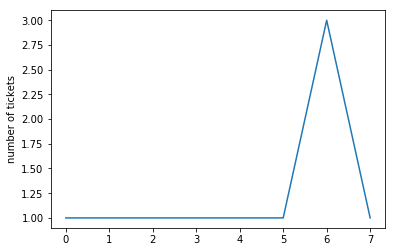

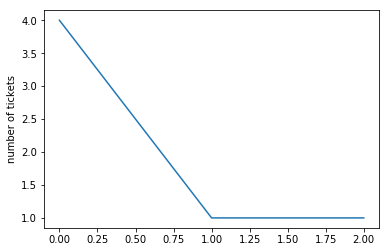

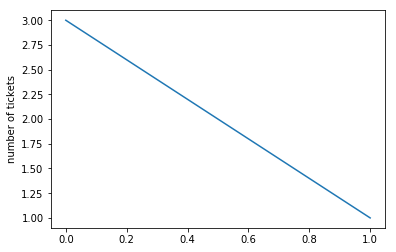

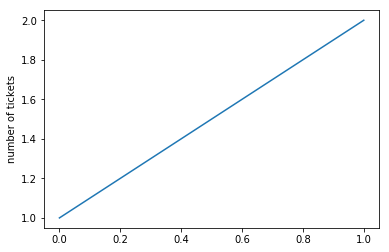

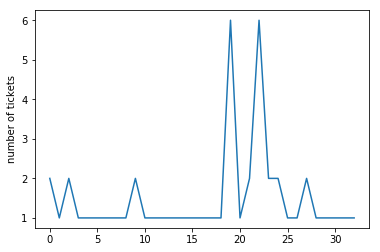

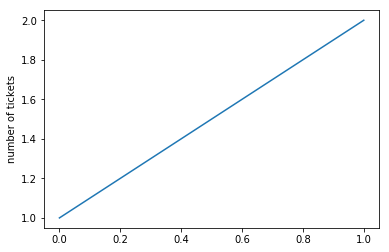

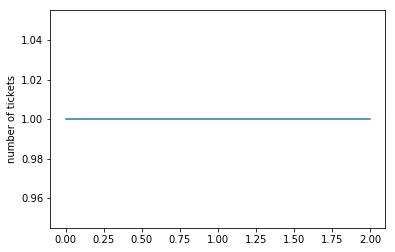

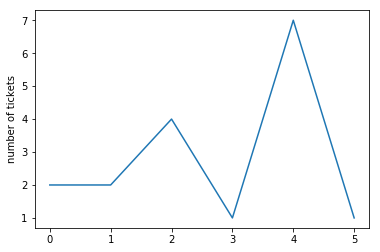

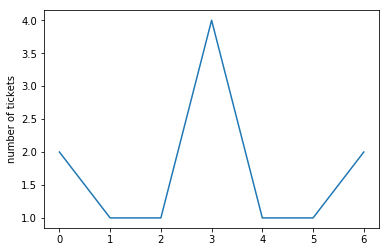

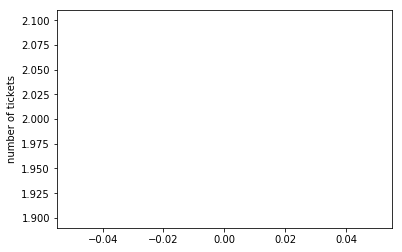

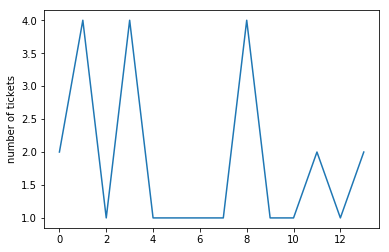

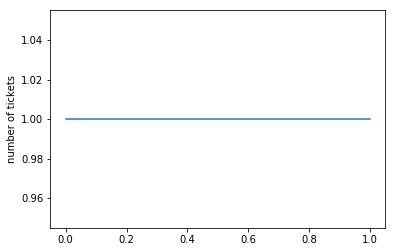

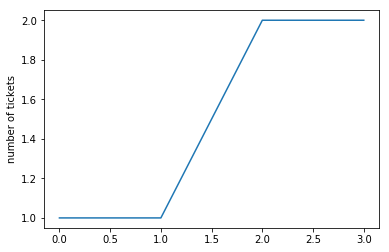

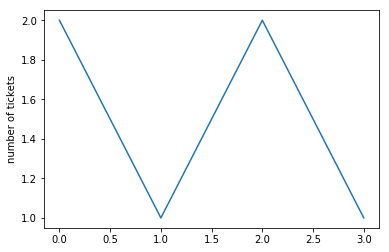

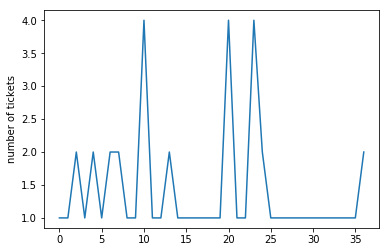

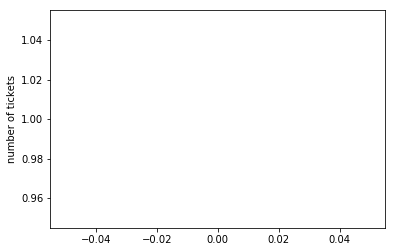

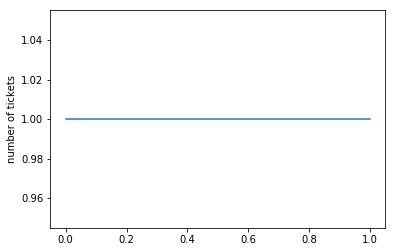

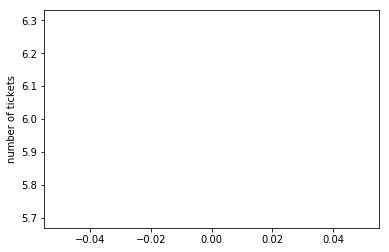

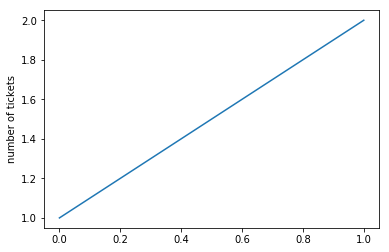

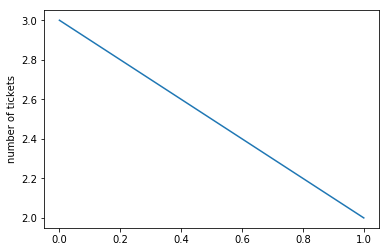

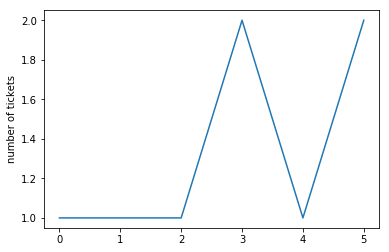

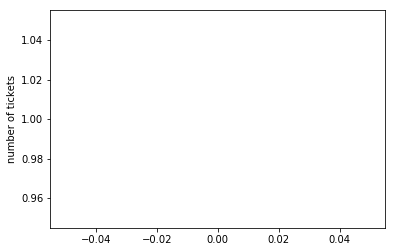

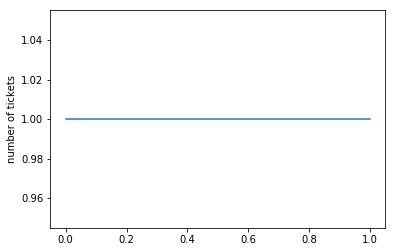

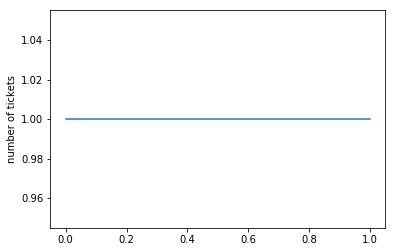

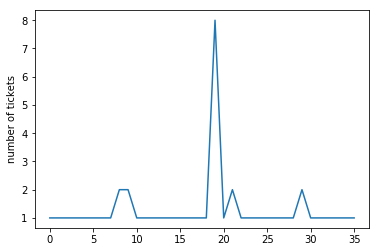

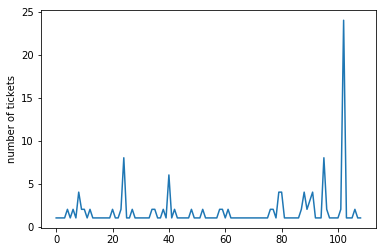

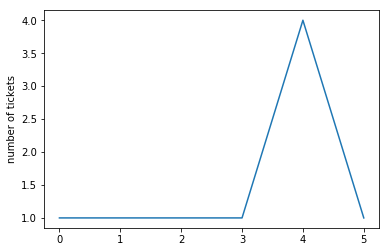

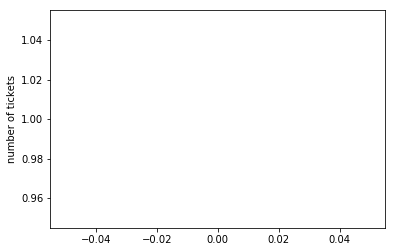

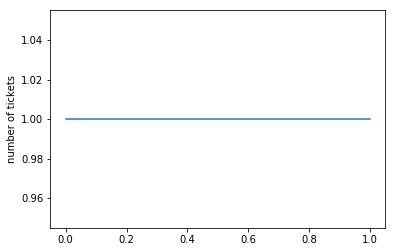

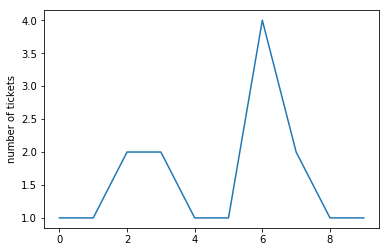

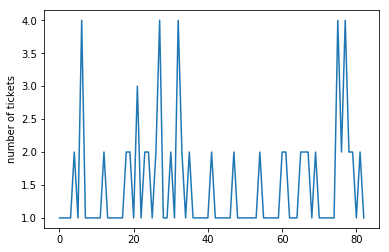

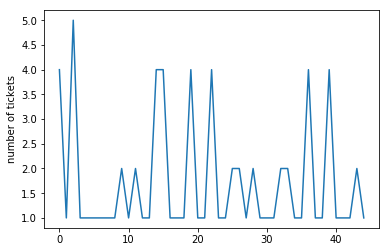

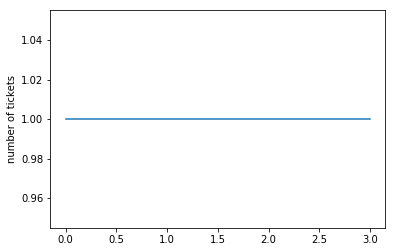

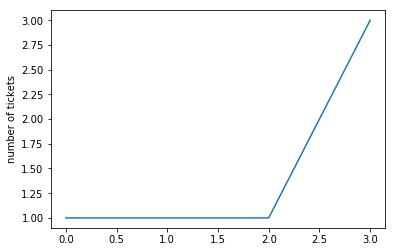

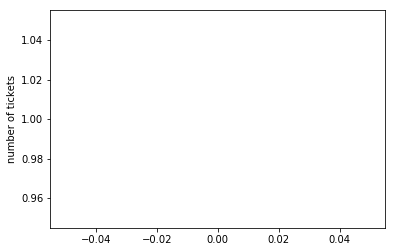

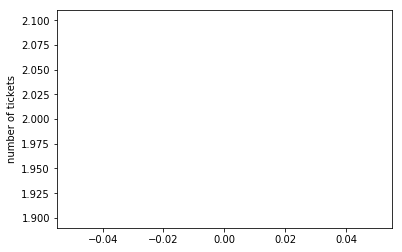

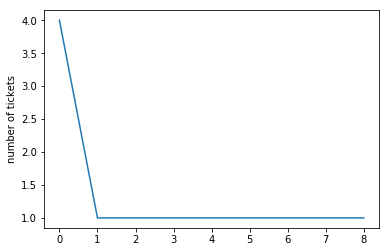

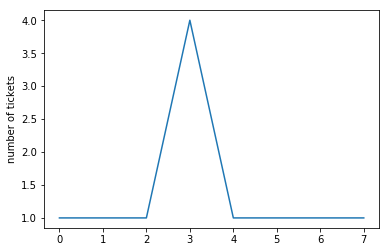

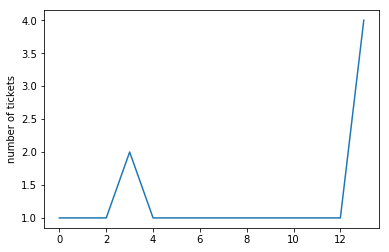

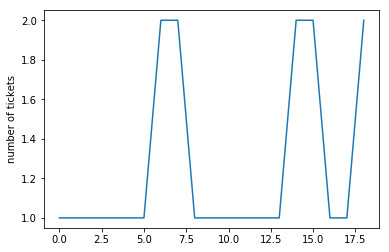

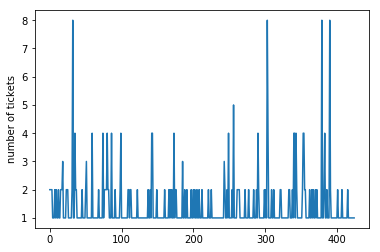

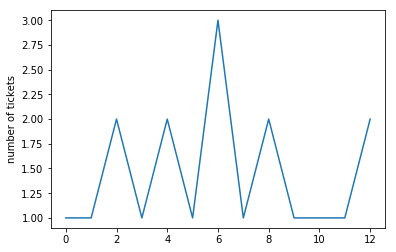

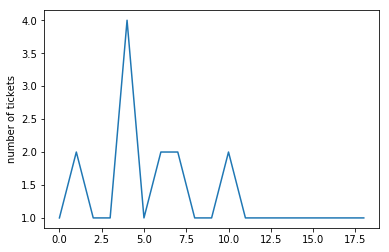

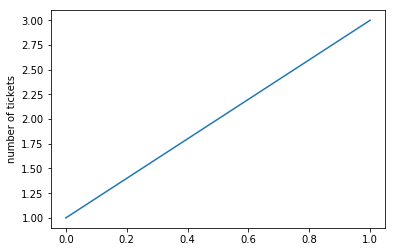

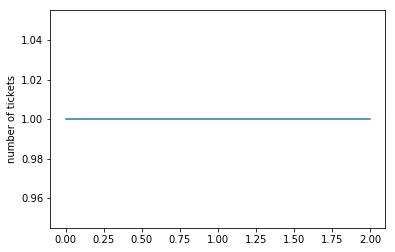

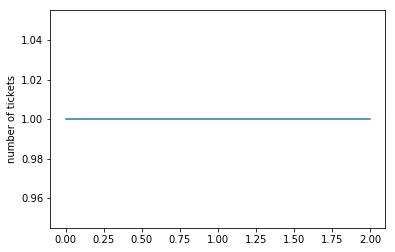

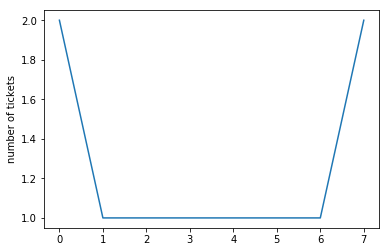

          date  country  channel_id  n_tickets
0   2018-03-08       -1          -1        1.0
1   2018-03-08        4          -1        1.0
2   2018-03-08        5          -1        1.0
3   2018-03-08        7          -1        2.0
4   2018-03-08        8          -1        1.0
5   2018-03-08        9          -1        1.0
6   2018-03-08       11          -1        1.0
7   2018-03-08       12          -1        1.0
8   2018-03-08       14          -1        1.0
9   2018-03-07       15          -1        1.0
10  2018-03-08       16          -1        1.0
11  2018-03-07       17          -1        2.0
12  2018-03-08       19          -1        2.0
13  2018-03-08       20          -1        2.0
14  2018-03-08       21          -1        1.0
15  2018-03-08       23          -1        1.0
16  2018-03-08       24          -1        1.0
17  2018-03-08       26          -1        2.0
18  2018-03-08       27          -1        2.0
19  2018-03-04       28          -1        1.0
20  2018-03-0

In [125]:
dict_test = {'date':[], 'country':[], 'channel_id':[], 'n_tickets':[]}

for name,group in df_merged_grouped:
    group = group.sort_values(by=['date'])
    
    # features are month and day, label is the number of tickets
    y_train = group[['n_tickets']]
    
    plt.plot(np.arange(0, len(y_train.values), 1), y_train.values, )
    plt.ylabel('number of tickets')
    plt.show()
    
    date_test = group.iloc[-1]['date'] + pd.Timedelta(days=10)

    dict_test['date'].append(date_test)
    dict_test['country'].append(group.iloc[0]['country'])
    dict_test['channel_id'].append(group.iloc[0]['channel_id'])
    dict_test['n_tickets'].append(round(y_train.values.mean()))
    

df_test = pd.DataFrame(dict_test)
print(df_test)

In [122]:
df_test['n_tickets'].unique()

array([1., 2., 4., 3., 6.])

In [ ]:
df_test.to_csv('pred_approach2_mean.csv', index=False)

### Approach 2 (does not work)

- Train a regression model on all the data. The features are: date (year, month, day), channel, and country. The label is the number of tickets.
- For each group (channel, country), create a test sample as presented in Approach 1.
- Use the trained regression model to predict the number of tickets of all the test samples.

In [ ]:
df_merged = pd.read_csv('df_merged.csv')
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged.info()

In [ ]:
df_merged.columns

#### Prepare the training set

In [ ]:
cols_feature = ['channel_id', 'country', 'year', 'month', 'day']

In [ ]:
len(cols_feature)

In [ ]:
x_train = df_merged[cols_feature]

In [ ]:
x_train.shape

In [ ]:
y_train = df_merged[['n_tickets']]

In [ ]:
y_train.shape

#### Prepare the test set

In [ ]:
df_merged_grouped = df_merged.groupby(['channel_id', 'country'])

In [ ]:
dict_test = {'date':[], 'country':[], 'channel_id':[], 'n_tickets':[]}
for col_feature in cols_feature:
    dict_test[col_feature] = []

In [ ]:
dict_test

In [ ]:
df_test = pd.DataFrame(dict_test)

In [ ]:
cols_feature

In [ ]:
for name,group in df_merged_grouped:
    group = group.sort_values(by=['date'])
    
    # get the last date of the group
    date_test = group.iloc[-1]['date'] + pd.Timedelta(days=10)

    # generate test sample
    dict_test['date'].append(date_test)
    dict_test['n_tickets'] = 0
    for col_feature in cols_feature:
        dict_test[col_feature].append(group.iloc[0][col_feature])   

In [ ]:
df_test = pd.DataFrame(dict_test)
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test['year'] = df_test['date'].dt.year

In [ ]:
df_test.info()

In [ ]:
x_test = df_test[cols_feature]

In [ ]:
x_test.shape

#### Model training

xgboost

https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
https://www.kaggle.com/mburakergenc/predictions-with-xgboost-and-linear-regression

One advantage of tree based model is that it works directly on the categorical features. No one-hot and feature scaling are needed.

In [ ]:
import xgboost as xgb

x_train_sub, x_val, y_train_sub, y_val = train_test_split(x_train, y_train, test_size = 0.1)

dtrain = xgb.DMatrix(x_train, label=y_train)
dsubtrain = xgb.DMatrix(x_train_sub, label=y_train_sub)
dval = xgb.DMatrix(x_val, label=y_val)
dtest = xgb.DMatrix(x_test, label=y_test)

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    #'eval_metric':'mae',
    'eval_metric':'rmse',
    'n_estimators': 200,
}

model = xgb.train(
    params,
    dsubtrain,
    num_boost_round = 100,
    evals = [(dval, "Test")],
    early_stopping_rounds = 5
)


#### Prediction

In [ ]:
predicted = model.predict(dtest)
df_test['n_tickets'] = list(predicted)
df_test['n_tickets'] = df_test['n_tickets'].astype(int)
df_test.head()

In [ ]:
df_test['n_tickets'].unique()

In [ ]:
df_test.hist(column='n_tickets', bins=len(df_test['n_tickets'].unique()))
plt.show()

In [ ]:
for col_to_drop in ['year', 'month', 'day']:
    if col_to_drop in df_test.columns:
        df_test.drop(col_to_drop, inplace=True, axis=1)

In [ ]:
df_test.head()

#### Saving prediction 

In [ ]:
df_test.to_csv('pred_approach2_xgboost.csv', index=False)

#### Hyperparameter tuning

In [ ]:
best_params = ()

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    #'eval_metric':'mae',
    'eval_metric':'rmse',
}

cv_results = {}

# Define initial best params and RMSE
min_rmse = float("Inf")

best_params = None

gridsearch_params = [
    (max_depth, min_child_weight)
    #for max_depth in range(9,12)
    for max_depth in [2, 4, 6, 8]
    for min_child_weight in [5, 6, 8]
    #for min_child_weight in range(5,8)
]


for (max_depth, min_child_weight) in gridsearch_params:
    
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=200,
        seed=42,
        nfold=3,
        #metrics={'mae'},
        metrics={'rmse'},
        early_stopping_rounds=5
    )
    # Update best MAE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth, min_child_weight)
        print("update best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))
        
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

In [ ]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]

model = xgb.train(
    params,
    dsubtrain,
    num_boost_round=100,
    evals=[(dval, "Test")],
    early_stopping_rounds=5
)

In [ ]:
predicted = model.predict(dtest)
df_test['n_tickets'] = list(predicted)
df_test['n_tickets'] = df_test['n_tickets'].astype(int)
df_test.head()

In [ ]:
df_test['n_tickets'].unique()

In [ ]:
df_test.hist(column='n_tickets', bins=len(df_test['n_tickets'].unique()))
plt.show()

In [ ]:
for col_to_drop in ['year', 'month', 'day']:
    if col_to_drop in df_test.columns:
        df_test.drop(columns=[col_to_drop], inplace=True)

In [ ]:
df_test.to_csv('pred_approach2_xgboost_max-depth-{}_min-child-weight-{}.csv'.format(params['max_depth'], params['min_child_weight']), index=False)

#### TODO: for other no-tree based model one-hot encoding on categorical features is needed

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

In [ ]:
cols_cat = ['channel_id', 'country']
for col_cat in cols_cat:
    one_hot = pd.get_dummies(df_merged[col_cat], prefix=col_cat)
    #df_merged = df_merged.drop(col_cat, axis = 1)
    df_merged = df_merged.join(one_hot)

In [ ]:
cols_feature = list(df_merged.columns) 
for col_remove in ['id', 'channel_id', 'country', 'date', 'n_tickets', 'type', 'country_1', 'country_2']:
    cols_feature.remove(col_remove)

#### TODO: Check cross validation scores for different regression model
https://stackoverflow.com/questions/24132237/scikit-learn-cross-validation-scoring-for-regression

In [ ]:
loo = cross_validation.LeaveOneOut(len(y_train))

In [ ]:
scores = cross_validation.cross_val_score(LinearRegression(), x_train, y_train, scoring='mean_squared_error', cv=loo,)

In [ ]:
scores

In [ ]:
scores = cross_validation.cross_val_score(Lasso(), x_train, y_train, scoring='mean_squared_error', cv=loo,)

In [ ]:
scores

In [ ]:
scores = cross_validation.cross_val_score(Ridge(), x_train, y_train, scoring='mean_squared_error', cv=loo,)

In [ ]:
scores

#### TODO: Train a regression model with parameter tuning
https://stackoverflow.com/questions/49522928/cross-validation-in-linear-regression


In [ ]:
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('regr', Ridge())
])

param_grid = [
    {
        'regr': [Lasso(), Ridge()],
        'regr__alpha': np.logspace(-4, 1, 6),
    },
    {
        'regr': [SGDRegressor()],
        'regr__alpha': np.logspace(-5, 0, 6),
        'regr__max_iter': [500, 1000],
    },
]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=4, verbose=2)
grid.fit(x_train, y_train)



In [ ]:
predicted = grid.predict(x_test)
dict_test['n_tickets'] = y_test


In [ ]:
dict_test

In [ ]:
df_test.to_csv('pred_approach2_xgboost.csv', index=False)

#### TODO: Try other regression models
https://gogul09.github.io/software/sklearn-regression-models

## 3. Conclusion